# Loading the Data

In [1]:
# load data

# import the experiment utilities package
import exputils as eu
import numpy as np

# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget()

display(experiment_data_loader)
experiment_data_loader.load_data()

ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

Output()

# Plotting the Data

In [2]:
## experiment data selection plotter that takes as input the data loader to plot its loaded data
experiment_data_plotter = eu.gui.jupyter.ExperimentDataPlotSelectionWidget(experiment_data_loader)
display(experiment_data_plotter)

ExperimentDataPlotSelectionWidget(children=(HBox(children=(Label(value='Data Sources:', layout=Layout(min_widt…

Output()

In [2]:
import os
import dill

def load_experiment_data(experiment_num):
    num_str = "%06d" % experiment_num
    #repetition_str = "%06d" % repetition_num


    base_dir = "../experiments/experiment_"+num_str+"/"
    data_dir = "../experiments/experiment_"+num_str+"/repetition_000000/data/"

    print(f"Loading {data_dir}")
    
    with open(data_dir+"dataset.dill", 'rb') as data:
        datasets = dill.load(data)


    means = {}
    stds = {}

    train_loss = {}
    test_loss = {}
    val_loss = {}

    # Iterate over each entry in the given path
    for repetition_entry in os.listdir(base_dir):
        # Create full path
        repetition_path = os.path.join(base_dir, repetition_entry)

        if not os.path.isdir(repetition_path):
            continue


        for dataset_entry in os.listdir(repetition_path):
            dataset_path = os.path.join(repetition_path, dataset_entry)
            if os.path.isdir(dataset_path) and "data" in dataset_entry and dataset_entry != "data":
                dataset_name = dataset_entry[4:]

                if dataset_name not in means:
                    means[dataset_name] = []
                    stds[dataset_name] = []
                    train_loss[dataset_name] = []
                    test_loss[dataset_name] = []
                    val_loss[dataset_name] = []

                _rep_dataset_means = []
                _rep_dataset_stds = []

                _test_loss = None
                _train_loss = None
                _val_loss = None

                for data_entry in os.listdir(dataset_path):
                
                    try:
                        data_path = os.path.join(dataset_path, data_entry)

                        if "mean" in data_entry and data_entry[0] != ".":
                            mean = np.load(data_path)
                            _rep_dataset_means.append(mean)

                        if "std" in data_entry and data_entry[0] != ".":
                            std = np.load(data_path)
                            _rep_dataset_stds.append(std)

                        if "train_loss" in data_entry and data_entry[0] != ".":
                            _train_loss = np.load(data_path)

                        if "test_loss" in data_entry and data_entry[0] != ".":
                            _test_loss = np.load(data_path)

                        if "val_loss" in data_entry and data_entry[0] != ".":
                            _val_loss = np.load(data_path)
                    except:
                        print(f"Error at retrieving data for: {data_entry}")

                if len(_rep_dataset_means) > 0:
                    _rep_dataset_means = np.stack(_rep_dataset_means)

                if len(_rep_dataset_stds) > 0:
                    _rep_dataset_stds = np.stack(_rep_dataset_stds)

                means[dataset_name].append(_rep_dataset_means)
                stds[dataset_name].append(_rep_dataset_stds)
                train_loss[dataset_name].append(_train_loss)
                test_loss[dataset_name].append(_test_loss)
                val_loss[dataset_name].append(_val_loss)


    for key,val in means.items():
        try:
            means[key] = np.stack(val).transpose((0,2,1))
            #print(f"loaded means {means[key].shape}")
        except:
            pass
            #print("Not present")

    for key,val in stds.items():
        try:
            stds[key] = np.stack(val).transpose((0,2,1))
            #print(f"loaded stds {stds[key].shape}")
        except:
            pass
            #print("Not present")

    for key,val in train_loss.items():
        try:
            train_loss[key] = np.stack(val).transpose((1,0))
            #print(f"loaded train {train_loss[key].shape}")
        except:
            pass
            #print("Not present")
    for key,val in test_loss.items():
        try:
            test_loss[key] = np.stack(val).transpose((1,0))
            #print(f"loaded test {test_loss[key].shape}")
        except:
            pass
            #print("Not present")
    for key,val in val_loss.items():
        try:
            val_loss[key] = np.stack(val).transpose((1,0))
            #print(f"loaded val {val_loss[key].shape}")
        except:
            pass
            #print("Not present")

            
    return means, stds, train_loss, test_loss, val_loss
    
means, stds, train_loss, test_loss, val_loss = load_experiment_data(7)   

print(test_loss.keys())

Loading ../experiments/experiment_000007/repetition_000000/data/
dict_keys(['556_analcatdata_apnea2', '631_fri_c1_500_5', '601_fri_c1_250_5', '519_vinnie', '485_analcatdata_vehicle', '613_fri_c3_250_5', '1030_ERA', '597_fri_c2_500_5', '712_chscase_geyser1', '1027_ESL', '523_analcatdata_neavote', '529_pollen', '599_fri_c2_1000_5', '596_fri_c2_250_5', '557_analcatdata_apnea1', '624_fri_c0_100_5', '663_rabe_266', 'banana', '228_elusage', '579_fri_c0_250_5', '678_visualizing_environmental', '1096_FacultySalaries', '1029_LEV', '210_cloud', '594_fri_c2_100_5', '192_vineyard', '609_fri_c0_1000_5', '611_fri_c3_100_5', '649_fri_c0_500_5', '617_fri_c3_500_5', '656_fri_c1_100_5', '612_fri_c1_1000_5', '628_fri_c3_1000_5', '690_visualizing_galaxy', '687_sleuth_ex1605'])


In [4]:
dataset_name = "678_visualizing_environmental"

In [5]:
### plot
import numpy as np
import plotly.graph_objects as go


data = test_loss[dataset_name]

print(data)
    
# Preparing data for plotting
epochs = np.arange(1, data.shape[0])
traces = []


data = np.expand_dims(data.mean(axis = 1), axis = 1)

for i in range(data.shape[1]):
    traces.append(go.Scatter(x=epochs, y=data[:, i], mode='lines', name=f'Value {i+1}'))
    


# Plotting with Plotly
layout = go.Layout(title='Change of 16 Values over 500 Steps',
                   xaxis=dict(title='Epoch'),
                   yaxis=dict(title='Value'),
                   template='plotly_dark')

fig = go.Figure(data=traces, layout=layout)
fig.show()

[[128.86613464 118.49707794  90.00453186 137.17625427]
 [         nan          nan          nan          nan]
 [         nan          nan          nan          nan]
 ...
 [         nan          nan          nan          nan]
 [         nan          nan          nan          nan]
 [         nan          nan          nan          nan]]


In [259]:
### plot
import numpy as np
import plotly.graph_objects as go


data = val_loss[dataset_name]
    
# Preparing data for plotting
epochs = np.arange(1, data.shape[0])
traces = []


data = np.expand_dims(data.mean(axis = 1), axis = 1)

for i in range(data.shape[1]):
    traces.append(go.Scatter(x=epochs, y=data[:, i], mode='lines', name=f'Value {i+1}'))
    


# Plotting with Plotly
layout = go.Layout(title='Change of 16 Values over 500 Steps',
                   xaxis=dict(title='Epoch'),
                   yaxis=dict(title='Value'),
                   template='plotly_dark')

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [29]:
method_grouping = [["svr"],["pls"],["gradboost"],
                ["mlp 0.01","mlp 0.001", "mlp 0.0001"],
                ["mrbf 0.01","mrbf 0.001", "mrbf 0.0001"],
                ["mrbf 0.01 fixed","mrbf 0.001 fixed", "mrbf 0.0001 fixed"],
                ["urbf 0.01","urbf 0.001", "urbf 0.0001"],
                ["urbf 0.01 fixed","urbf 0.001 fixed", "urbf 0.0001 fixed"],
                ["ffn_0.01_0.1","ffn_0.001_0.1","ffn_0.0001_0.1"],
                ["ffn_0.01_1","ffn_0.001_1","ffn_0.0001_1"],
                ["ffn_0.01_10","ffn_0.001_10","ffn_0.0001_10"],
                ["u_ffn_0.01_0.1","u_ffn_0.001_0.1","u_ffn_0.0001_0.1"],
                ["u_ffn_0.01_1","u_ffn_0.001_1","u_ffn_0.0001_1"],
                ["u_ffn_0.01_10","u_ffn_0.001_10","u_ffn_0.0001_10"]]


method_grouping = {'svr': ['svr'],
 'pls': ['pls'],
 'gradboost': ['gradboost'],
 'mlp': ['mlp 0.01', 'mlp 0.001', 'mlp 0.0001'],
 'mrbf': ['mrbf 0.01',
  'mrbf 0.001',
  'mrbf 0.0001'],
 'mrbf_fixed': ['mrbf 0.01 fixed',
  'mrbf 0.001 fixed',
  'mrbf 0.0001 fixed'],
 'urbf': ['urbf 0.01',
  'urbf 0.001',
  'urbf 0.0001'],
 'urbf_fixed':[
  'urbf 0.01 fixed',
  'urbf 0.001 fixed',
  'urbf 0.0001 fixed'],
 'ffn': ['ffn_0.01_0.1',
  'ffn_0.001_0.1',
  'ffn_0.0001_0.1',
  'ffn_0.01_1',
  'ffn_0.001_1',
  'ffn_0.0001_1',
  'ffn_0.01_10',
  'ffn_0.001_10',
  'ffn_0.0001_10'],
 'u_ffn': ['u_ffn_0.01_0.1',
  'u_ffn_0.001_0.1',
  'u_ffn_0.0001_0.1',
  'u_ffn_0.01_1',
  'u_ffn_0.001_1',
  'u_ffn_0.0001_1',
  'u_ffn_0.01_10',
  'u_ffn_0.001_10',
  'u_ffn_0.0001_10']}

method_names = [x
    for xs in list(method_grouping.values())
    for x in xs
   ]

print(method_names)


['svr', 'pls', 'gradboost', 'mlp 0.01', 'mlp 0.001', 'mlp 0.0001', 'mrbf 0.01', 'mrbf 0.001', 'mrbf 0.0001', 'mrbf 0.01 fixed', 'mrbf 0.001 fixed', 'mrbf 0.0001 fixed', 'urbf 0.01', 'urbf 0.001', 'urbf 0.0001', 'urbf 0.01 fixed', 'urbf 0.001 fixed', 'urbf 0.0001 fixed', 'ffn_0.01_0.1', 'ffn_0.001_0.1', 'ffn_0.0001_0.1', 'ffn_0.01_1', 'ffn_0.001_1', 'ffn_0.0001_1', 'ffn_0.01_10', 'ffn_0.001_10', 'ffn_0.0001_10', 'u_ffn_0.01_0.1', 'u_ffn_0.001_0.1', 'u_ffn_0.0001_0.1', 'u_ffn_0.01_1', 'u_ffn_0.001_1', 'u_ffn_0.0001_1', 'u_ffn_0.01_10', 'u_ffn_0.001_10', 'u_ffn_0.0001_10']


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import traceback 

max_method_num = 36

min_test_loss = {}
min_val_test_loss = {}


for i in range(1,max_method_num+1):
    means, stds, train_loss, test_loss, val_loss = load_experiment_data(i)    
    for dataset in list(train_loss.keys()):
        print(f"Analyzing: {dataset} {i}")
                
        try:
            #rep_min_test_loss = np.min(np.mean(test_loss[dataset],axis = 1),axis=0)
            #idx_min_val_loss = np.argmin(np.mean(val_loss[dataset],axis = 1),axis=0)
            rep_min_test_loss = np.min(test_loss[dataset],axis=0)
            idx_min_val_loss = np.argmin(val_loss[dataset],axis=0)

            if dataset not in min_test_loss:
                min_test_loss[dataset] = {}
                
            if dataset not in min_val_test_loss:
                min_val_test_loss[dataset] = {}

            min_test_loss[dataset][i] = np.mean(rep_min_test_loss,axis=0)
            min_val_test_loss[dataset][i] = np.mean(test_loss[dataset][idx_min_val_loss,:])
        except: 
            traceback.print_exc() 

### remove all inclompete datasets...
to_delete = []
for key, val in min_test_loss.items():
    if len(val.keys()) < max_method_num - 1:
        print(f"For {key} not all datasets present {len(val.keys())}")
        to_delete.append(key)


#for key in to_delete:
#    del min_test_loss[key]
#    del min_val_test_loss[key]
        
### Calculate with reference to specific method
reference_method = 3

# Calculate relative min test loss
relative_min_test_loss = {}
relative_min_val_test_loss = {}

for dataset_name, dataset_vals in min_test_loss.items():
    relative_min_test_loss[dataset_name] = {method: val / dataset_vals[reference_method] for method, val in dataset_vals.items()}

for dataset_name, dataset_vals in min_val_test_loss.items():    
    relative_min_val_test_loss[dataset_name] = {method: val / dataset_vals[reference_method] for method, val in dataset_vals.items()}    


#full_relative_min_test_loss = {}
        

Loading ../experiments/experiment_000001/repetition_000000/data/
Analyzing: 556_analcatdata_apnea2 1
Analyzing: 631_fri_c1_500_5 1
Analyzing: 601_fri_c1_250_5 1
Analyzing: 519_vinnie 1
Analyzing: 485_analcatdata_vehicle 1
Analyzing: 613_fri_c3_250_5 1
Analyzing: 1030_ERA 1
Analyzing: 597_fri_c2_500_5 1
Analyzing: 712_chscase_geyser1 1
Analyzing: 1027_ESL 1
Analyzing: 523_analcatdata_neavote 1
Analyzing: 529_pollen 1
Analyzing: 599_fri_c2_1000_5 1
Analyzing: 596_fri_c2_250_5 1
Analyzing: 557_analcatdata_apnea1 1
Analyzing: 624_fri_c0_100_5 1
Analyzing: 663_rabe_266 1
Analyzing: banana 1
Analyzing: 228_elusage 1
Analyzing: 579_fri_c0_250_5 1
Analyzing: 678_visualizing_environmental 1
Analyzing: 1096_FacultySalaries 1
Analyzing: 1029_LEV 1
Analyzing: 210_cloud 1
Analyzing: 594_fri_c2_100_5 1
Analyzing: 192_vineyard 1
Analyzing: 609_fri_c0_1000_5 1
Analyzing: 611_fri_c3_100_5 1
Analyzing: 649_fri_c0_500_5 1
Analyzing: 617_fri_c3_500_5 1
Analyzing: 656_fri_c1_100_5 1
Analyzing: 612_fri_c1_1

Analyzing: 556_analcatdata_apnea2 11
Analyzing: 631_fri_c1_500_5 11
Analyzing: 601_fri_c1_250_5 11
Analyzing: 519_vinnie 11
Analyzing: 485_analcatdata_vehicle 11
Analyzing: 613_fri_c3_250_5 11
Analyzing: 1030_ERA 11
Analyzing: 597_fri_c2_500_5 11
Analyzing: 712_chscase_geyser1 11
Analyzing: 1027_ESL 11
Analyzing: 523_analcatdata_neavote 11
Analyzing: 529_pollen 11
Analyzing: 599_fri_c2_1000_5 11
Analyzing: 596_fri_c2_250_5 11
Analyzing: 557_analcatdata_apnea1 11
Analyzing: 624_fri_c0_100_5 11
Analyzing: 663_rabe_266 11
Analyzing: banana 11
Analyzing: 228_elusage 11
Analyzing: 579_fri_c0_250_5 11
Analyzing: 678_visualizing_environmental 11
Analyzing: 1096_FacultySalaries 11
Analyzing: 1029_LEV 11
Analyzing: 210_cloud 11
Analyzing: 594_fri_c2_100_5 11
Analyzing: 192_vineyard 11
Analyzing: 609_fri_c0_1000_5 11
Analyzing: 611_fri_c3_100_5 11
Analyzing: 649_fri_c0_500_5 11
Analyzing: 617_fri_c3_500_5 11
Analyzing: 656_fri_c1_100_5 11
Analyzing: 612_fri_c1_1000_5 11
Analyzing: 628_fri_c3_100

Analyzing: 556_analcatdata_apnea2 20
Analyzing: 631_fri_c1_500_5 20
Analyzing: 601_fri_c1_250_5 20
Analyzing: 519_vinnie 20
Analyzing: 485_analcatdata_vehicle 20
Analyzing: 613_fri_c3_250_5 20
Analyzing: 1030_ERA 20
Analyzing: 597_fri_c2_500_5 20
Analyzing: 712_chscase_geyser1 20
Analyzing: 1027_ESL 20
Analyzing: 523_analcatdata_neavote 20
Analyzing: 529_pollen 20
Analyzing: 599_fri_c2_1000_5 20
Analyzing: 596_fri_c2_250_5 20
Analyzing: 557_analcatdata_apnea1 20
Analyzing: 624_fri_c0_100_5 20
Analyzing: 663_rabe_266 20
Analyzing: banana 20
Analyzing: 228_elusage 20
Analyzing: 579_fri_c0_250_5 20
Analyzing: 678_visualizing_environmental 20
Analyzing: 1096_FacultySalaries 20
Analyzing: 1029_LEV 20
Analyzing: 210_cloud 20
Analyzing: 594_fri_c2_100_5 20
Analyzing: 192_vineyard 20
Analyzing: 609_fri_c0_1000_5 20
Analyzing: 611_fri_c3_100_5 20
Analyzing: 649_fri_c0_500_5 20
Analyzing: 617_fri_c3_500_5 20
Analyzing: 656_fri_c1_100_5 20
Analyzing: 612_fri_c1_1000_5 20
Analyzing: 628_fri_c3_100

Analyzing: 556_analcatdata_apnea2 29
Analyzing: 631_fri_c1_500_5 29
Analyzing: 601_fri_c1_250_5 29
Analyzing: 519_vinnie 29
Analyzing: 485_analcatdata_vehicle 29
Analyzing: 613_fri_c3_250_5 29
Analyzing: 1030_ERA 29
Analyzing: 597_fri_c2_500_5 29
Analyzing: 712_chscase_geyser1 29
Analyzing: 1027_ESL 29
Analyzing: 523_analcatdata_neavote 29
Analyzing: 529_pollen 29
Analyzing: 599_fri_c2_1000_5 29
Analyzing: 596_fri_c2_250_5 29
Analyzing: 557_analcatdata_apnea1 29
Analyzing: 624_fri_c0_100_5 29
Analyzing: 663_rabe_266 29
Analyzing: banana 29
Analyzing: 228_elusage 29
Analyzing: 579_fri_c0_250_5 29
Analyzing: 678_visualizing_environmental 29
Analyzing: 1096_FacultySalaries 29
Analyzing: 1029_LEV 29
Analyzing: 210_cloud 29
Analyzing: 594_fri_c2_100_5 29
Analyzing: 192_vineyard 29
Analyzing: 609_fri_c0_1000_5 29
Analyzing: 611_fri_c3_100_5 29
Analyzing: 649_fri_c0_500_5 29
Analyzing: 617_fri_c3_500_5 29
Analyzing: 656_fri_c1_100_5 29
Analyzing: 612_fri_c1_1000_5 29
Analyzing: 628_fri_c3_100

In [31]:
import plotly.graph_objects as go
import plotly.express as px

colors = px.colors.qualitative.Plotly

colors = [*colors,*colors,*colors,*colors]

dataset_names = list(min_test_loss.keys())

for dataset_name in dataset_names:
    # Extract methods and corresponding test losses for the current dataset
    methods = list(relative_min_test_loss[dataset_name].keys())
    test_losses = [relative_min_test_loss[dataset_name][method] for method in methods]

    # Create a bar chart for the current dataset
    fig = go.Figure(data=[
        go.Bar(
            x=methods,
            y=test_losses,
            name=dataset_name,
            marker_color=colors[:len(methods)]  # Assign different colors to each bar
        )
    ])

    print(methods)
    
    # Customize the layout
    fig.update_layout(
        title=f'Relative Min Test Loss by Method for {dataset_name}',
        xaxis=dict(
            title='Method',
            #tickmode='array',
            #tickvals=list(range(len(methods))),
            #ticktext=methods
        ),
        yaxis=dict(
            title='Relative Min Test Loss'
        ),
        legend_title=dataset_name
        # Additional customizations can be added here
    )

    # Show the plot
    fig.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [32]:

dataset_names = list(min_val_test_loss.keys())

for dataset_name in dataset_names:
    # Preparing data for bar chart
    methods = list(relative_min_val_test_loss[dataset_name].keys())
    test_losses = [relative_min_val_test_loss[dataset_name][method] for method in methods]


    # Create a bar chart for the current dataset
    fig = go.Figure(data=[
        go.Bar(
            x=methods,
            y=test_losses,
            name=dataset_name,
            marker_color=colors[:len(methods)]  # Assign different colors to each bar
        )
    ])

    # Customize the layout
    fig.update_layout(
        title=f'Relative Min Validation Test Loss by Method for {dataset_name}',
        xaxis=dict(
            title='Method',
        ),
        yaxis=dict(
            title='Relative Min Test Loss'
        ),
        legend_title=dataset_name
        # Additional customizations can be added here
    )

    # Show the plot
    fig.show()
    

In [33]:
### The mean over all datasets is not a good indicator!! (Prone to outliers) Every dataset has different properties and therefore different methods perform best.

import plotly.express as px

dataset_names = list(min_val_test_loss.keys())

summary_test_loss = {}


for dataset_name, dataset_vals in relative_min_val_test_loss.items():
    for method_name, method_val in dataset_vals.items():
        if method_name not in summary_test_loss:
            summary_test_loss[method_name] = []
        
        summary_test_loss[method_name].append(method_val)
        
for method_name, method_vals in summary_test_loss.items():
    summary_test_loss[method_name] = np.mean(method_vals)


# Adding bars for each dataset
methods = list(summary_test_loss.keys())
index = np.arange(len(methods))  # the label locations

test_losses = [summary_test_loss[method] for method in methods]
dataset_name = "summary"
# Create a bar chart for the current dataset
fig = go.Figure(data=[
    go.Bar(
        x=methods,
        y=test_losses,
        name=dataset_name,
        marker_color = colors[:len(methods)]  # Assign different colors to each bar
    )
])

# Customize the layout
fig.update_layout(
    title=f'Relative Min Test Loss by Method for {dataset_name}',
    xaxis=dict(
        title='Method',
        #tickmode='array',
        tickvals=list(range(len(methods))),
        ticktext=methods
    ),
    yaxis=dict(
        title='Relative Min Test Loss'
    ),
    legend_title=dataset_name
    # Additional customizations can be added here
)

# Show the plot
fig.show()


In [34]:
import plotly.graph_objects as go
import numpy as np

dataset_names = list(relative_min_val_test_loss.keys())
methods = list(set([method for dataset in relative_min_val_test_loss.values() for method in dataset.keys()]))



best_method = {}

# Prepare data for heatmap
heatmap_data = []
best_methods_indices = []

for dataset in dataset_names:
    dataset_vals = []
    best_loss = float('inf')
    best_method_index = -1

    for index, method in enumerate(methods):
        loss = relative_min_val_test_loss[dataset].get(method, None)
        
        if loss is not None: ### only used to get a clearer contrast between low value scores..
            loss = min(20,loss)
        
        dataset_vals.append(loss)

        if loss is not None and loss < best_loss:
            best_loss = loss
            best_method_index = index
    
    heatmap_data.append(dataset_vals)
    best_methods_indices.append(best_method_index)
    
    best_method[dataset] = best_method_index

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data,
    x=method_names,
    y=dataset_names,
    colorscale='Turbo'
))

# Overlay with scatter plot to highlight the best methods
for i, best_index in enumerate(best_methods_indices):
    fig.add_trace(go.Scatter(
        x=[method_names[best_index]],
        y=[dataset_names[i]],
        mode='markers',
        marker=dict(
            color='red',
            size=4,
            line=dict(
                color='red',
                width=1
                
            )
        )
    ))

# Customize layout
fig.update_layout(
    title='Relative Min Test Loss by Method and Dataset',
    xaxis=dict(title='Method'),
    yaxis=dict(title='Dataset'),
    showlegend=False
)

# Show the plot
fig.show()


In [35]:
#### Lets investigate the spectrum of datasets
import exputils as eu
import numpy as np
import matplotlib.pyplot as plt
from function_regression.datasets.pmlb_dataset import PMLBDataset
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import plotly.graph_objects as go
import plotly.express as px

dataset_names = list(relative_min_val_test_loss.keys())

dataset_info = []

for dataset_name in dataset_names:
    config = eu.AttrDict()
    config.name = dataset_name
    
    dataset = PMLBDataset(config)
    
    x, y = dataset.generate_samples()
    

    # Assuming dataset has attributes or methods to get input dimension and sample size
    input_dim = len(x[0])  # Example: input dimension could be derived from the shape of x
    sample_size = len(x)  # Example: sample size could be the length of x
    number = best_method[dataset_name]  # Get the number associated with the dataset

    dataset_info.append((input_dim, sample_size, dataset_name, number//3))

    
# Convert dataset information to a format suitable for Plotly
input_dims, sample_sizes, names, numbers = zip(*dataset_info)

fig = go.Figure()

# Create a contrasting colormap
color_scale = [*px.colors.sequential.Plasma,*px.colors.sequential.Plasma]

print(color_scale)


for input_dim, sample_size, name, number in zip(input_dims, sample_sizes, names, numbers):
    marker_color = dict(color=color_scale[number-1], size=10)

    fig.add_trace(go.Scatter(
        x=[input_dim], 
        y=[sample_size], 
        text=[name],
        mode='markers+text',
        marker=marker_color,
        name=name
    ))

fig.update_layout(
    title='Sample Size vs Input Dimension for Datasets (Log Scale for Sample Size)',
    xaxis_title='Input Dimension',
    yaxis_title='Sample Size',
    yaxis_type='log'  # Set y-axis to logarithmic scale
)

fig.show()


fetching: 556_analcatdata_apnea2
Sampled X:(475, 3) Y:(475, 1) from 556_analcatdata_apnea2
fetching: 631_fri_c1_500_5
Sampled X:(500, 5) Y:(500, 1) from 631_fri_c1_500_5
fetching: 601_fri_c1_250_5
Sampled X:(250, 5) Y:(250, 1) from 601_fri_c1_250_5
fetching: 519_vinnie
Sampled X:(380, 2) Y:(380, 1) from 519_vinnie
fetching: 485_analcatdata_vehicle
Sampled X:(48, 4) Y:(48, 1) from 485_analcatdata_vehicle
fetching: 613_fri_c3_250_5
Sampled X:(250, 5) Y:(250, 1) from 613_fri_c3_250_5
fetching: 1030_ERA
Sampled X:(1000, 4) Y:(1000, 1) from 1030_ERA
fetching: 597_fri_c2_500_5
Sampled X:(500, 5) Y:(500, 1) from 597_fri_c2_500_5
fetching: 712_chscase_geyser1
Sampled X:(222, 2) Y:(222, 1) from 712_chscase_geyser1
fetching: 1027_ESL
Sampled X:(488, 4) Y:(488, 1) from 1027_ESL
fetching: 523_analcatdata_neavote
Sampled X:(100, 2) Y:(100, 1) from 523_analcatdata_neavote
fetching: 529_pollen
Sampled X:(3848, 4) Y:(3848, 1) from 529_pollen
fetching: 599_fri_c2_1000_5
Sampled X:(1000, 5) Y:(1000, 1) 

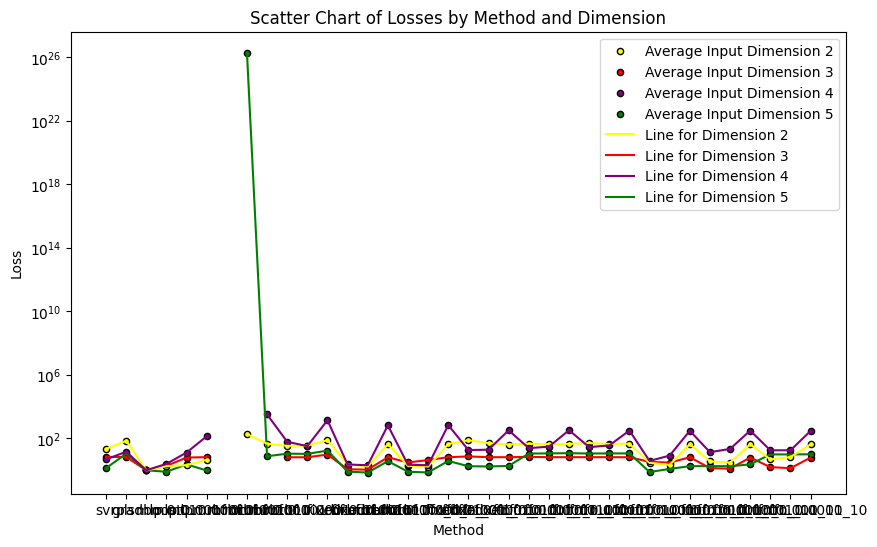

In [36]:
##### How to compare these...
import numpy as np

loss_per_dimension = {}

for key, val in relative_min_val_test_loss.items():

    dataset_ind = names.index(key)
    dataset_dim = input_dims[dataset_ind]
        
    if dataset_dim not in loss_per_dimension:
        loss_per_dimension[dataset_dim] = [val]
    else:
        loss_per_dimension[dataset_dim].append(val)


average_losses = {}
all_data = []

for dim, dim_vals in loss_per_dimension.items():
    v = {k: np.mean([dic[k] for dic in dim_vals]) for k in dim_vals[0]}
    average_losses[dim] = v
    all_data.extend([(dim, method, loss) for d in dim_vals for method, loss in d.items()])

# Preparing data for scatter plot
unique_methods = set()
for _, method, _ in all_data:
    unique_methods.add(method)

method_indices = {method: i for i, method in enumerate(unique_methods)}

# Scatter plot
colors = ['red', 'green', 'blue', 'yellow', 'purple']  # Adjust as needed for dimensions

plt.figure(figsize=(10, 6))

# Adding average data with legends
for dim, method_losses in average_losses.items():
    for method, avg_loss in method_losses.items():
        plt.scatter(method_indices[method], avg_loss, color=colors[input_dims.index(dim)], edgecolors='black', s=20, label=f'Average Input Dimension {dim}' if f'Average Input Dimension {dim}' not in plt.gca().get_legend_handles_labels()[1] else "")

# New code to connect averages
for dim, method_losses in average_losses.items():
    # Collecting and sorting average points for each dimension
    sorted_avg_points = sorted(method_losses.items(), key=lambda x: method_indices[x[0]])
    avg_methods, avg_losses = zip(*sorted_avg_points)

    # Converting method names to their indices
    avg_method_indices = [method_indices[method] for method in avg_methods]

    # Drawing lines
    plt.plot(avg_method_indices, avg_losses, color=colors[input_dims.index(dim)], label=f'Line for Dimension {dim}' if f'Line for Dimension {dim}' not in plt.gca().get_legend_handles_labels()[1] else "")

# Adding labels and title
plt.xticks(range(len(unique_methods)), method_names)
plt.xlabel('Method')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Scatter Chart of Losses by Method and Dimension')


# Extracting handles and labels for the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Sorting the labels and handles by label
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: x[1])
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Adding the sorted legend
plt.legend(sorted_handles, sorted_labels)


#plt.legend()

# Show plot
plt.show()

    

In [37]:
import pandas as pd

# Prepare the data for DataFrame
data_for_df = {}

for index, method in enumerate(methods):
    data_for_df[method_names[index]] = []
    for dataset in dataset_names:
        loss = min_val_test_loss[dataset].get(method, None)
        #if loss is not None:
        #    loss = min(np.inf, loss)  # Apply the same limit as used in the heatmap
        data_for_df[method_names[index]].append(loss)

# Create the DataFrame
df = pd.DataFrame(data_for_df, index=dataset_names)

df = df.div(df.min(axis=1), axis=0)


df

svr          pls  gradboost  mlp 0.01  \
556_analcatdata_apnea2           8.518293     8.042826   1.000000  2.288545   
631_fri_c1_500_5                 3.110088    26.817929   2.169344  1.011551   
601_fri_c1_250_5                 4.518368    23.485793   2.067355  1.241231   
519_vinnie                       1.654886     6.871467   1.121702  1.013251   
485_analcatdata_vehicle          2.653423     3.747349   1.000000  1.329351   
613_fri_c3_250_5                 3.308879    22.840086   2.433057  1.302742   
1030_ERA                         1.000000     2.117432   1.038140  2.100525   
597_fri_c2_500_5                 3.567814    31.137761   2.200327  1.117527   
712_chscase_geyser1              4.185163     8.023083   1.372247  1.371283   
1027_ESL                         1.047946    12.780618   1.089635  1.146249   
523_analcatdata_neavote          3.361811    27.723950   2.743897  1.304397   
529_pollen                       1.000000     7.860410   1.032084  6.827810   
599_fri_c2_1000_5                1.806808    24.032423   1.165123  1.130674   
596_fri_c2_250_5                 6.023880    26.305608   2.704160  1.200909   
557_analcatdata_apnea1          12.125792    11.526678   1.065628  2.183133   
624_fri_c0_100_5                 1.716506    13.411502   1.754674  1.207688   
663_rabe_266                   833.156932  2746.567014   5.789116  3.407425   
banana                           1.000193     3.173306   1.000000  8.157995   
228_elusage                      4.678102     8.716540   1.890187  1.476685   
579_fri_c0_250_5                 1.461067    18.765257   2.113093  1.098905   
678_visualizing_environmental    1.000000     1.674766   1.071321  1.415052   
1096_FacultySalaries             5.548313    17.213768   1.908139  1.017220   
1029_LEV                         1.000000     4.031823   1.049013  2.121353   
210_cloud                        1.339772     6.548158   1.017405  1.020436   
594_fri_c2_100_5                 2.353631     8.262093   1.866970  1.415969   
192_vineyard                     1.453053     3.682155   1.679265  1.114457   
609_fri_c0_1000_5                1.000000    28.843091   1.560907  2.191558   
611_fri_c3_100_5                 3.420694    22.670179   4.766595  1.443297   
649_fri_c0_500_5                 1.247016    25.688757   1.865995  1.035052   
617_fri_c3_500_5                 4.363624    29.353430   2.467953  1.190074   
656_fri_c1_100_5                 2.316527    13.107489   2.137569  4.688489   
612_fri_c1_1000_5                1.907820    21.588681   1.258529  1.112745   
628_fri_c3_1000_5                1.957936    22.097350   1.415562  1.425081   
690_visualizing_galaxy          24.141599    65.054530   1.000000  4.039458   
687_sleuth_ex1605                2.286832     3.345539   1.000000  1.177107   

                               mlp 0.001  mlp 0.0001  mrbf 0.01    mrbf 0.001  \
556_analcatdata_apnea2          7.598763    8.097257   8.316273  8.236154e+00   
631_fri_c1_500_5                1.142634    1.177523   1.798557  1.537796e+00   
601_fri_c1_250_5                1.353971    1.654867   2.057431  1.926081e+00   
519_vinnie                      1.331284    1.328375        NaN  1.577479e+00   
485_analcatdata_vehicle         1.248857    3.539619   3.214780  1.402951e+00   
613_fri_c3_250_5                1.112038    1.379623   1.663507  2.158127e+00   
1030_ERA                        2.021894    1.956991   2.657446  2.108924e+00   
597_fri_c2_500_5                1.102267    1.102955   1.161617  1.331919e+00   
712_chscase_geyser1             1.285033   10.211523  70.699170  1.986466e+00   
1027_ESL                        1.000000    1.124213   1.090525  1.208419e+00   
523_analcatdata_neavote         1.701653   10.201638   1.319862  1.492300e+00   
529_pollen                      6.214881    5.873751        NaN           NaN   
599_fri_c2_1000_5               1.019162    1.013029   1.210469  1.423791e+00   
596_fri_c2_250_5                1.376246    2.232633   1.92

In [38]:
import pandas as pd

# Assuming 'df' is your original DataFrame and 'method_dict' is the dictionary of method groups we created earlier.

method_dict = method_grouping

# Prepare the data for the new DataFrame
data_for_reduced_df = {group: [] for group in method_dict}

# Iterating over each row in the DataFrame
for index, row in df.iterrows():
    for group, methods in method_dict.items():
        group_values = [row[method] for method in methods if method in row]
        # Find the minimum value for this group, if there are any values
        min_value = min(group_values) if group_values else None
        data_for_reduced_df[group].append(min_value)

# Create the new reduced DataFrame
reduced_df = pd.DataFrame(data_for_reduced_df, index=df.index)

reduced_df = reduced_df.drop('pls', axis=1)

# This 'reduced_df' will now have columns named after each method group, 
# with the lowest value from that group in each row.

#print(reduced_df.to_latex())

reduced_df



svr  gradboost       mlp       mrbf  \
556_analcatdata_apnea2           8.518293   1.000000  2.288545   8.070274   
631_fri_c1_500_5                 3.110088   2.169344  1.011551   1.537796   
601_fri_c1_250_5                 4.518368   2.067355  1.241231   1.926081   
519_vinnie                       1.654886   1.121702  1.013251        NaN   
485_analcatdata_vehicle          2.653423   1.000000  1.248857   1.402951   
613_fri_c3_250_5                 3.308879   2.433057  1.112038   1.663507   
1030_ERA                         1.000000   1.038140  1.956991   2.055769   
597_fri_c2_500_5                 3.567814   2.200327  1.102267   1.161617   
712_chscase_geyser1              4.185163   1.372247  1.285033   1.986466   
1027_ESL                         1.047946   1.089635  1.000000   1.090525   
523_analcatdata_neavote          3.361811   2.743897  1.304397   1.319862   
529_pollen                       1.000000   1.032084  5.873751        NaN   
599_fri_c2_1000_5                1.806808   1.165123  1.013029   1.210469   
596_fri_c2_250_5                 6.023880   2.704160  1.200909   1.929152   
557_analcatdata_apnea1          12.125792   1.065628  2.183133  11.381564   
624_fri_c0_100_5                 1.716506   1.754674  1.207688   1.988290   
663_rabe_266                   833.156932   5.789116  3.407425        NaN   
banana                           1.000193   1.000000  7.530696   7.795578   
228_elusage                      4.678102   1.890187  1.476685        NaN   
579_fri_c0_250_5                 1.461067   2.113093  1.039977   1.294348   
678_visualizing_environmental    1.000000   1.071321  1.331708        NaN   
1096_FacultySalaries             5.548313   1.908139  1.000000        NaN   
1029_LEV                         1.000000   1.049013  2.011670   2.007640   
210_cloud                        1.339772   1.017405  1.000000   1.262332   
594_fri_c2_100_5                 2.353631   1.866970  1.415969   1.699587   
192_vineyard                     1.453053   1.679265  1.092121   1.005136   
609_fri_c0_1000_5                1.000000   1.560907  1.980759   1.923286   
611_fri_c3_100_5                 3.420694   4.766595  1.342301   3.228355   
649_fri_c0_500_5                 1.247016   1.865995  1.035052   1.014198   
617_fri_c3_500_5                 4.363624   2.467953  1.133351   1.493861   
656_fri_c1_100_5                 2.316527   2.137569  2.506561   1.567326   
612_fri_c1_1000_5                1.907820   1.258529  1.000000   1.342037   
628_fri_c3_1000_5                1.957936   1.415562  1.224551   1.474635   
690_visualizing_galaxy          24.141599   1.000000  4.039458        NaN   
687_sleuth_ex1605                2.286832   1.000000  1.177107        NaN   

                                mrbf_fixed      urbf  urbf_fixed          ffn  \
556_analcatdata_apnea2            7.827493  1.153417    3.526685     7.952616   
631_fri_c1_500_5                 19.914776  1.318247    1.294022     1.745580   
601_fri_c1_250_5                 18.127781  1.076123    1.016637     2.573347   
519_vinnie                        4.182041  1.002238    1.000000     1.221944   
485_analcatdata_vehicle           2.458073  1.329459    1.306445     1.268818   
613_fri_c3_250_5                 16.445885  1.385124    1.224266     1.658203   
1030_ERA                          3.199524  2.009183    2.013292     2.078261   
597_fri_c2_500_5                 24.700369  1.217245    1.214458     1.598649   
712_chscase_geyser1               4.476465  1.000000    1.011999     1.330171   
1027_ESL                          6.585804  1.087522    1.107582     1.150841   
523_analcatdata_neavote          15.378281  1.405180    1.929670     1.991763   
529_pollen                       29.273860  6.225785    6.271969    30.101565   
599_fri_c2_1000_5                36.646300  1.091405    1.092228     1.429385   
596_fri_c2_250_5                 19.354815  1.260985    1.385297     2.104351   
557_analcatdata_apnea1           11.185127  1.0000

In [39]:
### print
latex = reduced_df.style.format(precision=2).highlight_min(axis=1, props="textbf:--rwrap;").to_latex()

latex = latex.replace("_","\_")

print(latex)


\begin{tabular}{lrrrrrrrrr}
 & svr & gradboost & mlp & mrbf & mrbf\_fixed & urbf & urbf\_fixed & ffn & u\_ffn \\
556\_analcatdata\_apnea2 & 8.52 & \textbf{1.00} & 2.29 & 8.07 & 7.83 & 1.15 & 3.53 & 7.95 & 1.13 \\
631\_fri\_c1\_500\_5 & 3.11 & 2.17 & 1.01 & 1.54 & 19.91 & 1.32 & 1.29 & 1.75 & \textbf{1.00} \\
601\_fri\_c1\_250\_5 & 4.52 & 2.07 & 1.24 & 1.93 & 18.13 & 1.08 & 1.02 & 2.57 & \textbf{1.00} \\
519\_vinnie & 1.65 & 1.12 & 1.01 & nan & 4.18 & 1.00 & \textbf{1.00} & 1.22 & 1.12 \\
485\_analcatdata\_vehicle & 2.65 & \textbf{1.00} & 1.25 & 1.40 & 2.46 & 1.33 & 1.31 & 1.27 & 1.11 \\
613\_fri\_c3\_250\_5 & 3.31 & 2.43 & 1.11 & 1.66 & 16.45 & 1.39 & 1.22 & 1.66 & \textbf{1.00} \\
1030\_ERA & \textbf{1.00} & 1.04 & 1.96 & 2.06 & 3.20 & 2.01 & 2.01 & 2.08 & 2.04 \\
597\_fri\_c2\_500\_5 & 3.57 & 2.20 & 1.10 & 1.16 & 24.70 & 1.22 & 1.21 & 1.60 & \textbf{1.00} \\
712\_chscase\_geyser1 & 4.19 & 1.37 & 1.29 & 1.99 & 4.48 & \textbf{1.00} & 1.01 & 1.33 & 1.16 \\
1027\_ESL & 1.05 & 1.09 & \tex

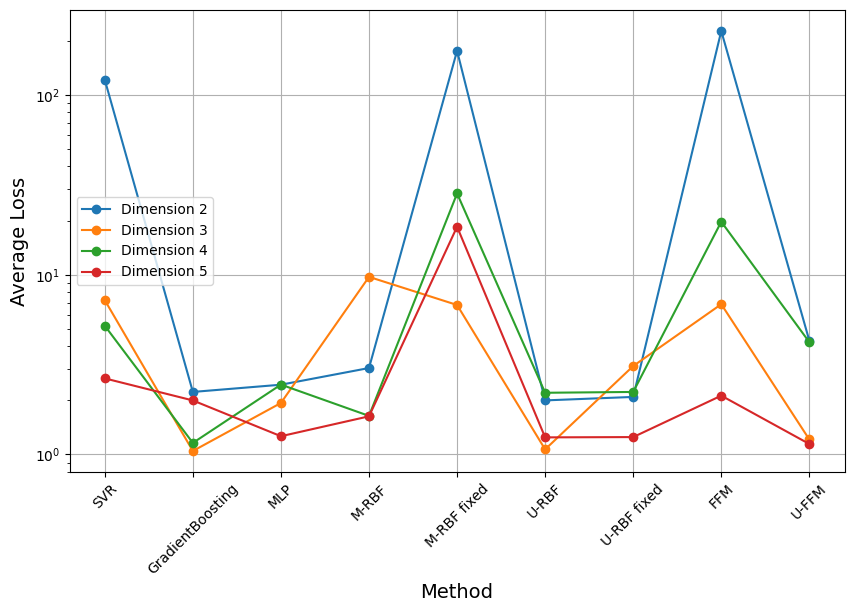

SVR  GradientBoosting       MLP     M-RBF  M-RBF fixed     U-RBF  \
2  121.355734          2.228059  2.444230  3.026761   175.990094  1.999134   
3    7.214695          1.045650  1.934462  9.725919     6.786777  1.067482   
4    5.198754          1.159573  2.447247  1.639221    28.307281  2.204367   
5    2.650403          1.998034  1.263575  1.630405    18.481732  1.245047   

   U-RBF fixed         FFM     U-FFM  
2     2.090156  226.853593  4.295080  
3     3.104937    6.853835  1.211626  
4     2.227936   19.711248  4.213889  
5     1.249688    2.124686  1.143729

In [42]:
# Create an empty DataFrame to store the average losses for each input dimensionality and method
avg_loss_df = pd.DataFrame()

# Grouping datasets by their input dimensions
for dim in set(input_dims):
    # Find the indices of datasets with the current dimensionality
    indices = [i for i, x in enumerate(input_dims) if x == dim]
    # Select only the rows of the reduced_df that correspond to these indices
    dim_df = reduced_df.iloc[indices]
    # Calculate the average loss for each method for this dimensionality
    avg_loss = dim_df.mean()
    # Add the average loss to the DataFrame with a new column for this dimensionality
    avg_loss_df[dim] = avg_loss

# Transpose the DataFrame to have input dimensionalities as rows and methods as columns
avg_loss_df = avg_loss_df.T

avg_loss_df.columns = [col.replace('mrbf', 'M-RBF').replace('urbf', 'U-RBF').replace('svr', 'SVR').replace('mlp', 'MLP').replace('gradboost', 'GradientBoosting').replace('_fixed', ' fixed').replace('u_ffn', 'U-FFM').replace('ffn', 'FFM') for col in avg_loss_df.columns]


# Plotting each row as a line in a scatter chart
plt.figure(figsize=(10, 6))

for dim in avg_loss_df.index:
    plt.plot(avg_loss_df.columns, avg_loss_df.loc[dim], marker='o', label=f'Dimension {dim}')

#plt.xlabel('Method', fontsize = 14)
plt.ylabel('Average Loss', fontsize = 14)
#plt.title('Average Loss by Method and Input Dimensionality')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.savefig("../../../assets/full_dataset_avr_per_dim.pdf", format="pdf", bbox_inches='tight')

plt.show()


avg_loss_df

In [39]:
avg_loss_df = avg_loss_df.style.format( precision=2).highlight_min(axis=1, props="textbf:--rwrap;")

print(avg_loss_df.to_latex())

\begin{tabular}{lrrrrrrrrr}
 & svr & gradboost & mlp & mrbf & mrbf_fixed & urbf & urbf_fixed & ffn & u_ffn \\
2 & 121.36 & 2.23 & 2.44 & 3.03 & 175.99 & \textbf{2.00} & 2.09 & 226.85 & 4.30 \\
3 & 7.21 & \textbf{1.05} & 1.93 & 9.73 & 6.79 & 1.07 & 3.10 & 6.85 & 1.21 \\
4 & 5.20 & \textbf{1.16} & 2.45 & 1.64 & 28.31 & 2.20 & 2.23 & 19.71 & 4.21 \\
5 & 2.65 & 2.00 & 1.26 & 1.63 & 18.48 & 1.25 & 1.25 & 2.12 & \textbf{1.14} \\
\end{tabular}



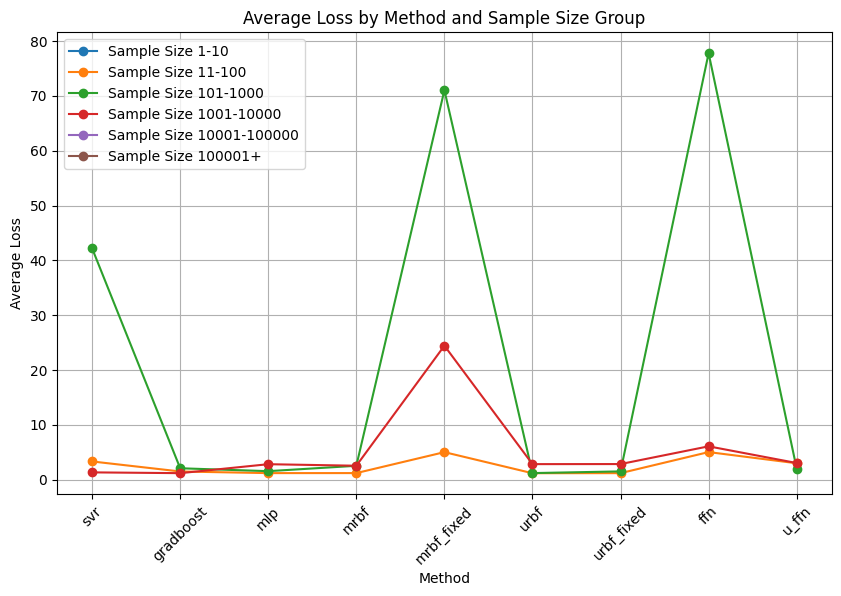

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'sample_sizes' is a list of integers representing the sample sizes for each dataset
# and 'reduced_df' is the DataFrame with minimum losses for each method group

# Step 1: Define magnitude groups for sample sizes (adjust these as needed)
magnitude_bins = [0, 10, 100, 1000, 10000, 100000, np.inf]
magnitude_labels = ['1-10', '11-100', '101-1000', '1001-10000', '10001-100000', '100001+']

# Step 2: Assign each sample size to a magnitude group
sample_size_groups = pd.cut(sample_sizes, bins=magnitude_bins, labels=magnitude_labels, right=False)

# Create an empty DataFrame for average losses
avg_loss_by_sample_size = pd.DataFrame()

# Step 3: Calculate the average losses for each sample size group
for group in magnitude_labels:
    # Find the indices of datasets in this group
    indices = [i for i, x in enumerate(sample_size_groups) if x == group]
    # Select only the rows of the reduced_df that correspond to these indices
    group_df = reduced_df.iloc[indices]
    # Calculate the average loss for each method for this sample size group
    avg_loss = group_df.mean()
    # Add the average loss to the DataFrame with a new column for this group
    avg_loss_by_sample_size[group] = avg_loss

# Transpose the DataFrame
avg_loss_by_sample_size = avg_loss_by_sample_size.T

# Step 4: Plot each group as a line in a scatter chart
plt.figure(figsize=(10, 6))

for group in avg_loss_by_sample_size.index:
    plt.plot(avg_loss_by_sample_size.columns, avg_loss_by_sample_size.loc[group], marker='o', label=f'Sample Size {group}')

plt.xlabel('Method')
plt.ylabel('Average Loss')
plt.title('Average Loss by Method and Sample Size Group')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group
group


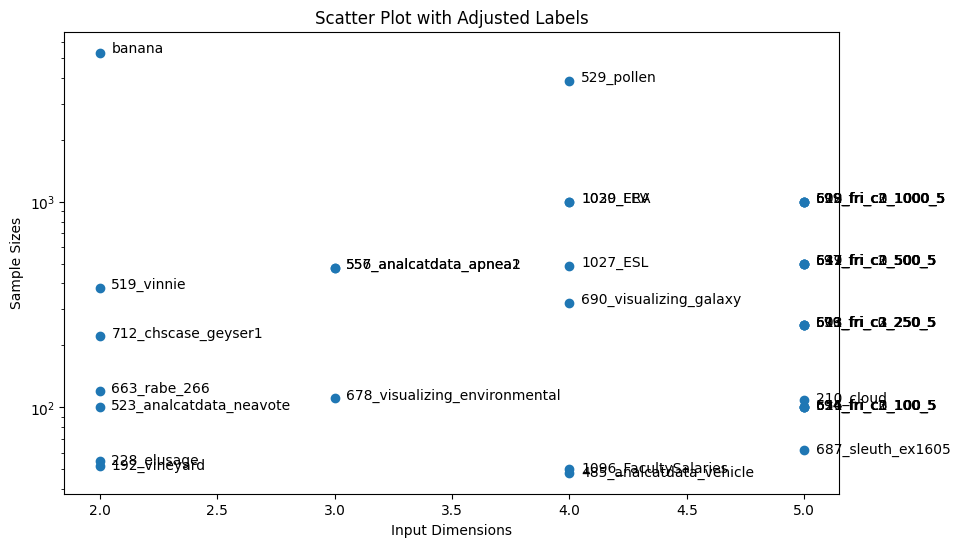

In [35]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Create figure
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(input_dims, sample_sizes)

# Sorting points by x-coordinate
sorted_points = sorted(zip(input_dims, sample_sizes, names), key=lambda x: x[0])

# List to hold the final groups
grouped_points = []

# Temporary list to hold the current group
current_group = []

# Current group criteria (input_dim, sample_size)
current_criteria = None

for point in sorted_points:
    # Check if the current point matches the current criteria
    if point[0:2] == current_criteria:
        # Add the point to the current group
        current_group.append(point[-1])
    else:
        # If there's a current group, add it to the grouped_points
        if current_group:
            grouped_points.append(current_group)

        # Start a new group with the current point
        current_group = [point[-1]]
        current_criteria = point[0:2]

# Add the last group if it exists
if current_group:
    grouped_points.append(current_group)
    
y_offset = 50
for idx, (x, y, name) in enumerate(sorted_points): 
    group_idx = 0

    for group in grouped_points:
        if name in group:
            group_idx = group.index(name)
            #names = ", ".join(group)
            #if group_idx == 0:
            print("group")
            plt.text(x + 0.05, y - 2, name)

plt.yscale('log')
plt.xlabel('Input Dimensions')
plt.ylabel('Sample Sizes')
plt.title('Scatter Plot with Adjusted Labels')

plt.show()


In [36]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

sorted_input_dims, sorted_sample_sizes, sorted_names = input_dims, sample_sizes, names

# Creating a normalized scale for the colorbar, ensuring it covers the range of input dimensions
#norm = Normalize(vmin=min(color_scale), vmax=max(color_scale))

# Adjusting the scatter plot according to the new requirements
x_new = np.arange(len(sorted_names))  # X-axis with indices for each dataset
y_new = np.array(sorted_sample_sizes)  # Sample sizes for the Y-axis

bubble_scale = np.array(sorted_input_dims) * 40  # Scale for bubble sizes
color_scale = np.array(sorted_input_dims) 

plt.figure(figsize=(8, 8))

# Creating the new scatter plot
scatter = plt.scatter(y_new, x_new, s=bubble_sizes, c=color_scale, cmap='viridis', alpha=0.6)

# Adding labels and title
plt.ylabel("Datasets", fontsize=12)
plt.xlabel("Sample Sizes", fontsize=12)
plt.xscale('log')

#plt.title("Datasets by Sample Sizes with Input Dimensions as Bubble Size")
plt.yticks(x_new, sorted_names,fontsize=10)  # Set the x-ticks to be the names of the datasets

# Adding a color bar to indicate the input dimensions
#plt.colorbar(scatter, label='Input Dimensions (Scaled)')

colorbar = plt.colorbar(scatter, ticks=np.unique(color_scale))
colorbar.set_label('Input Dimensions', fontsize=12)

plt.savefig("../../../assets/datasets_summary.pdf", format="pdf", bbox_inches='tight')


plt.grid(True)

plt.show()

NameError: name 'bubble_sizes' is not defined

<Figure size 800x800 with 0 Axes>

['0.1', '10', '10', '10', '1', '1']


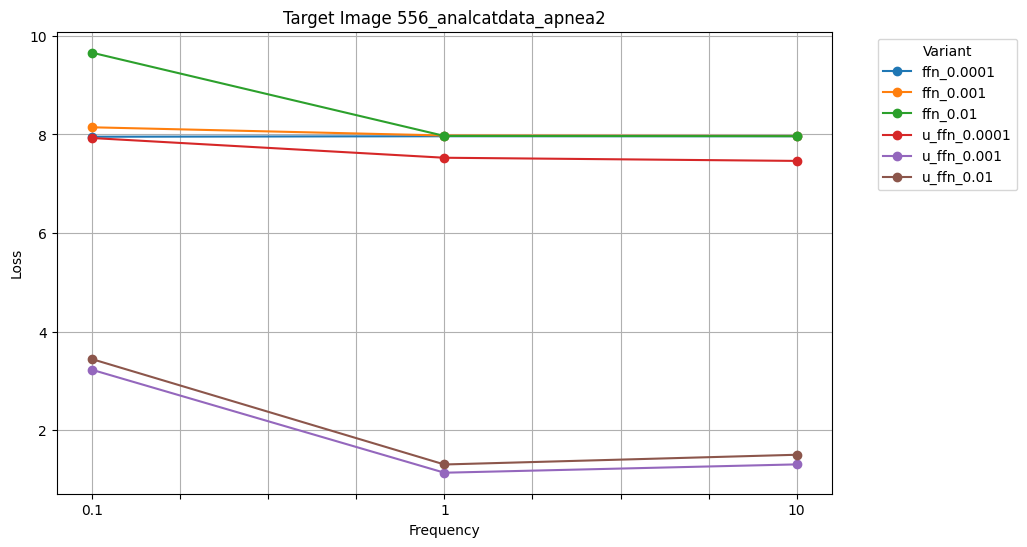

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


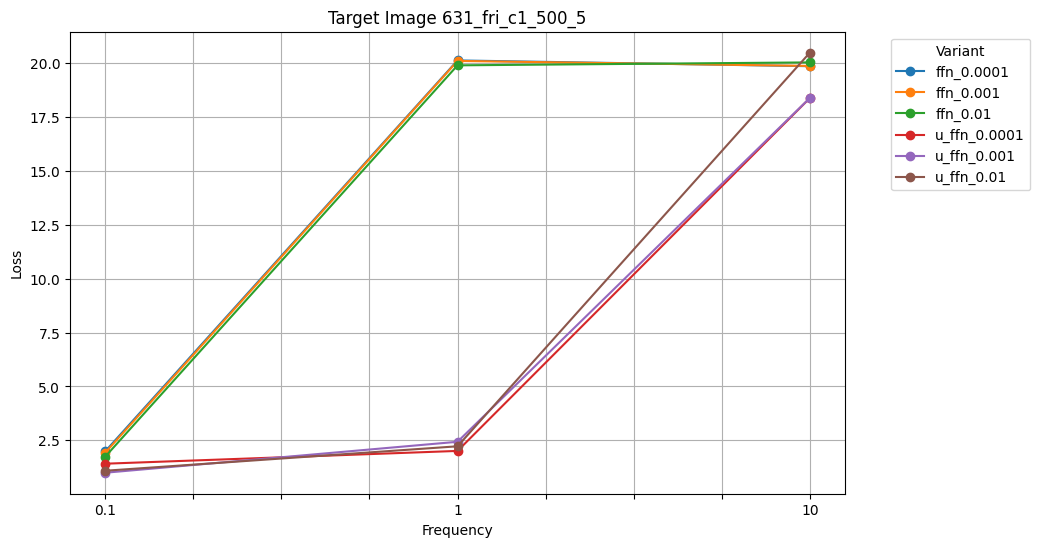

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


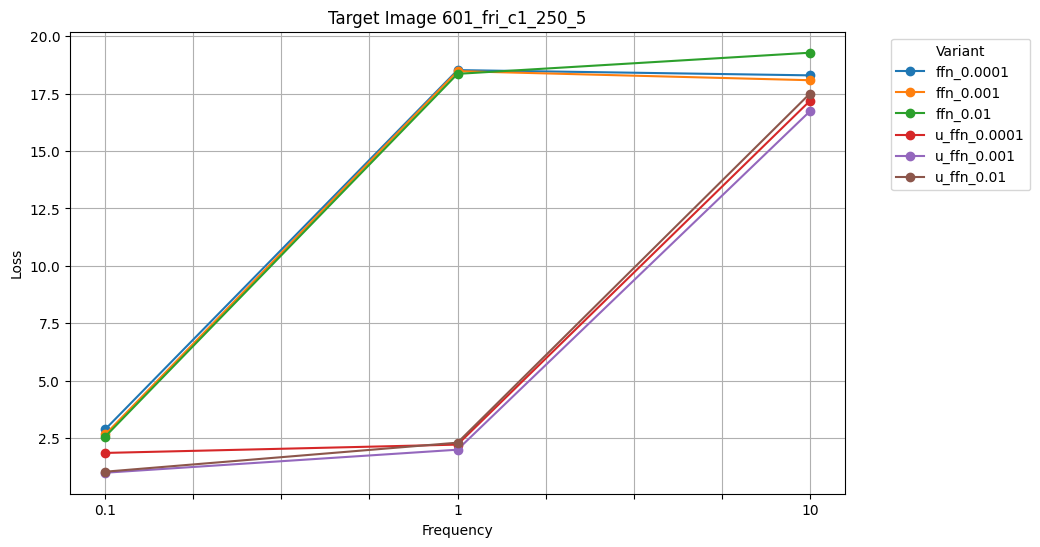

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


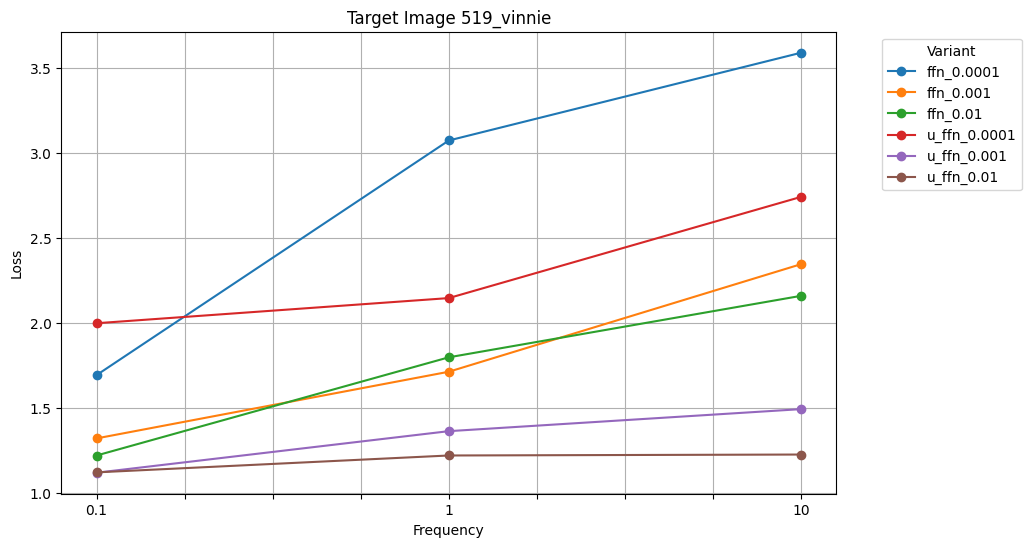

['10', '0.1', '0.1', '10', '10', '1']


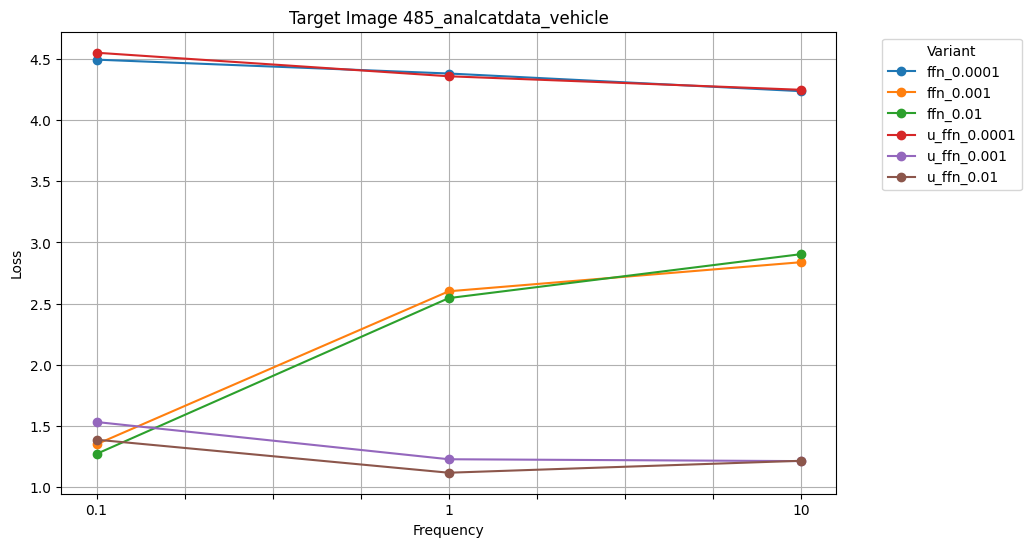

['0.1', '0.1', '0.1', '1', '0.1', '0.1']


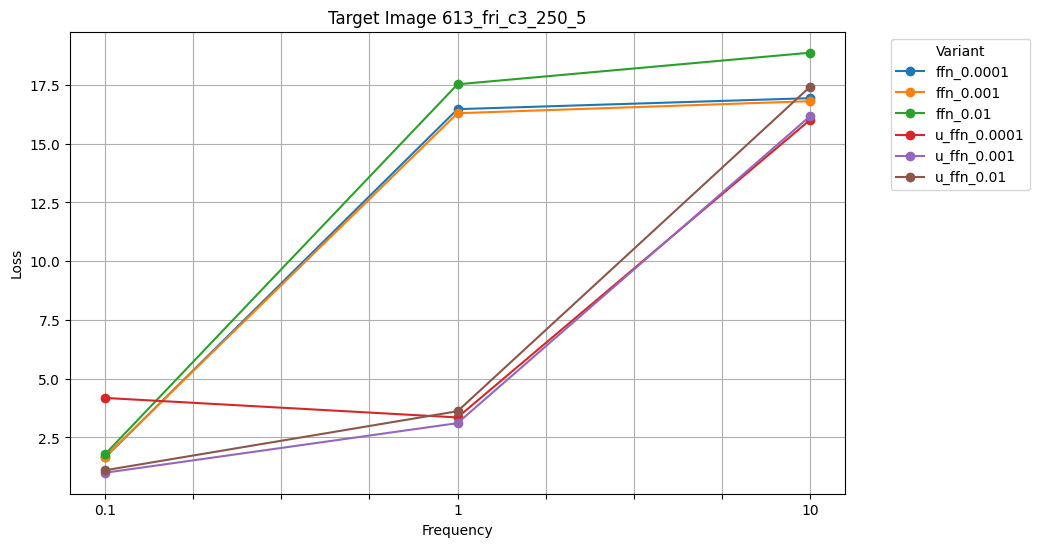

['0.1', '1', '0.1', '0.1', '0.1', '0.1']


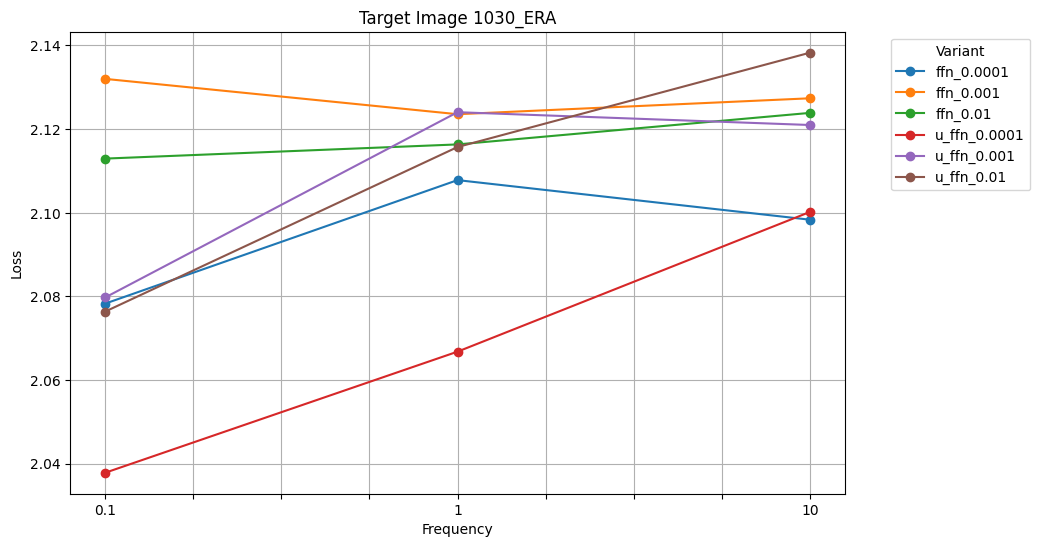

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


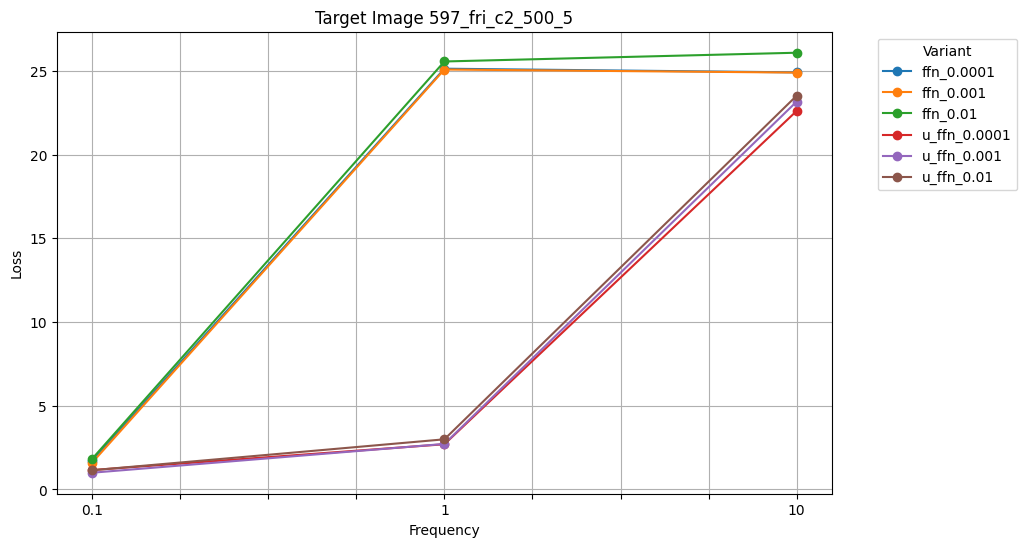

['0.1', '0.1', '0.1', '1', '0.1', '0.1']


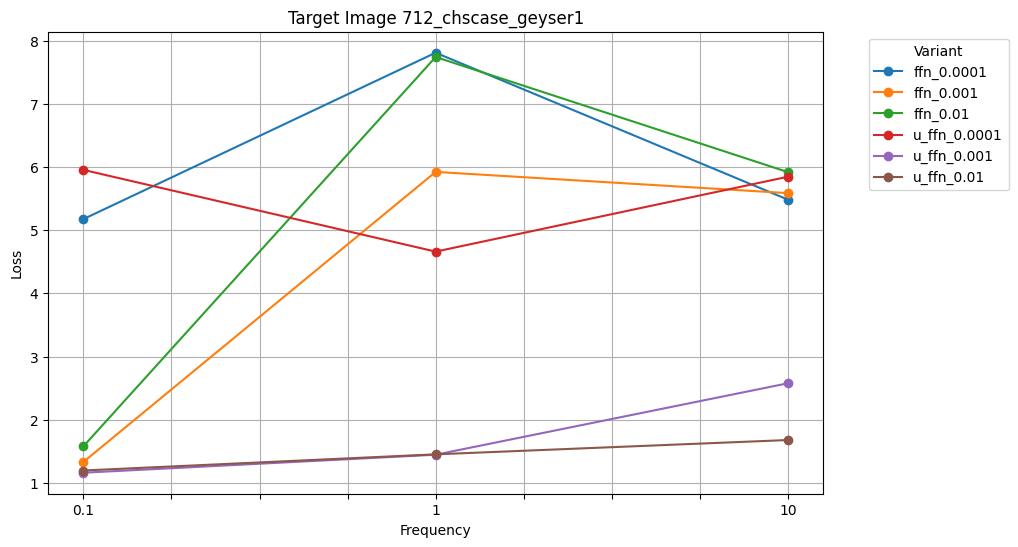

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


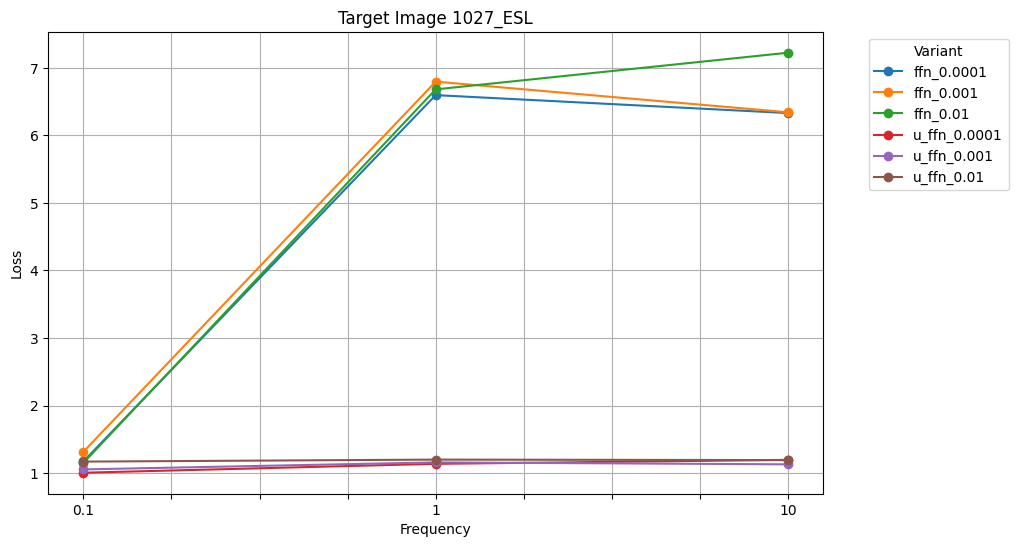

['1', '0.1', '0.1', '1', '10', '10']


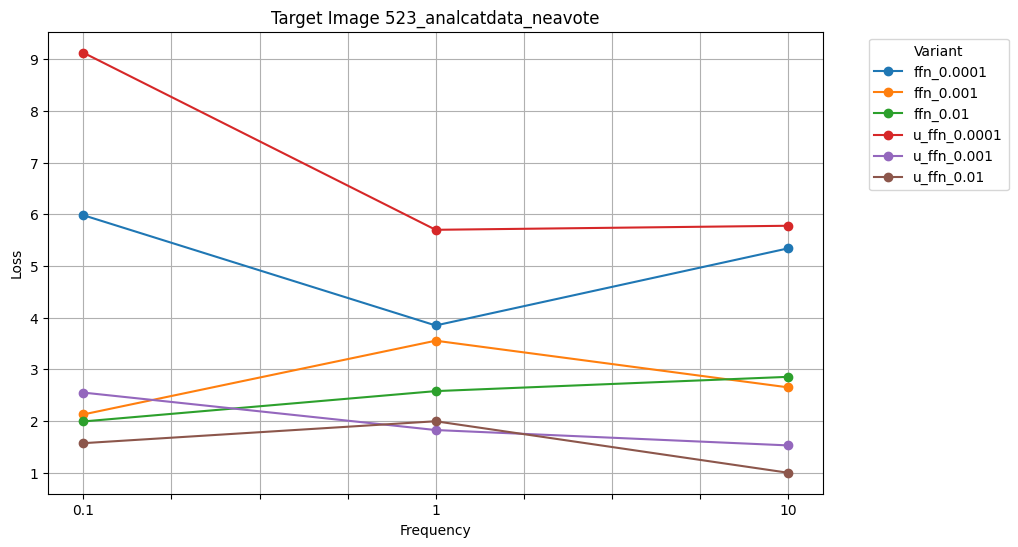

['0.1', '1', '1', '0.1', '0.1', '0.1']


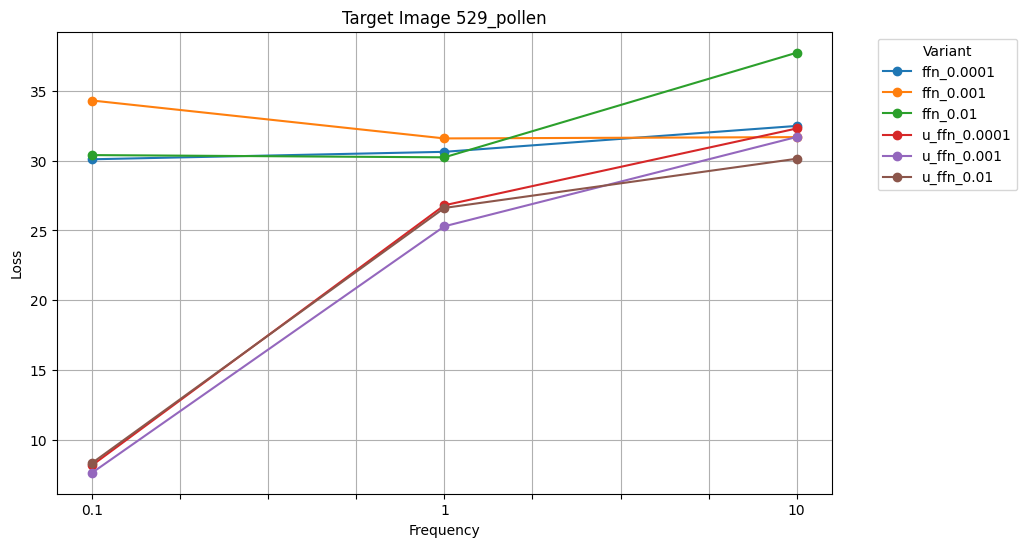

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


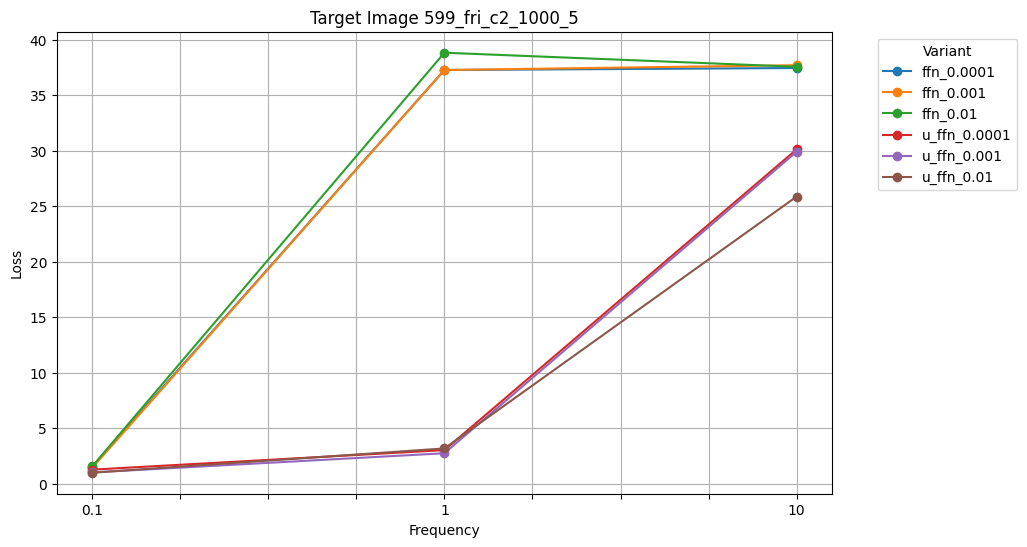

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


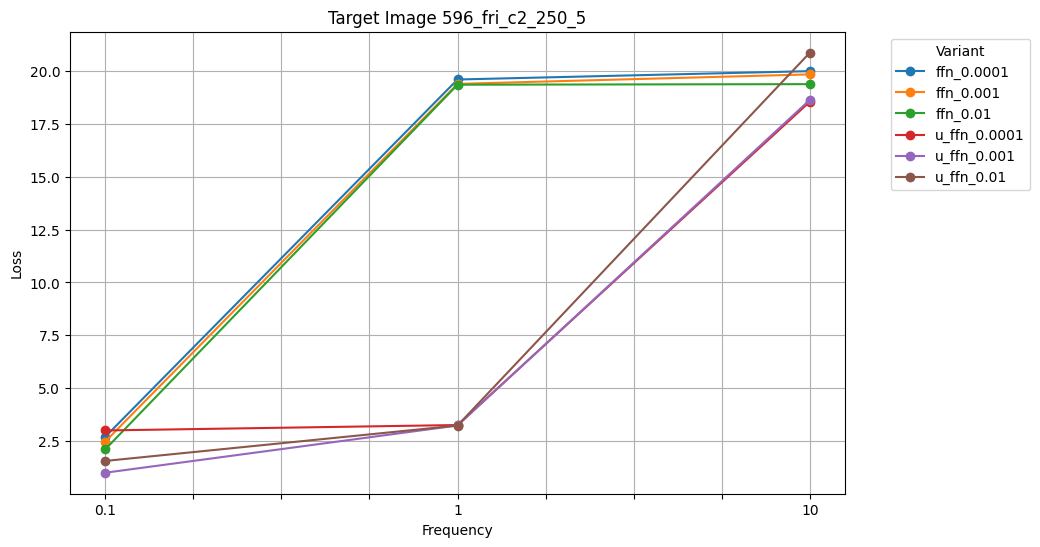

['0.1', '0.1', '0.1', '10', '1', '1']


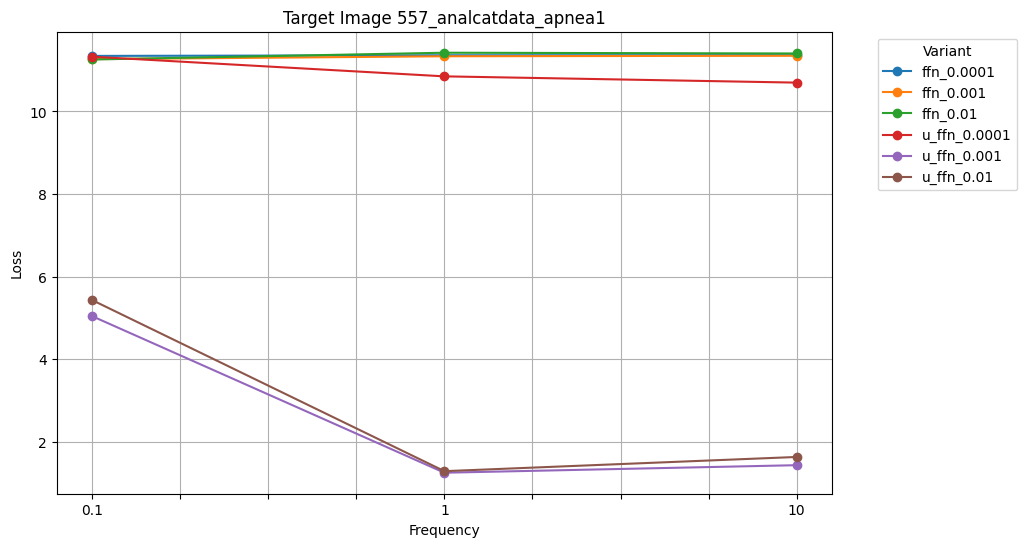

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


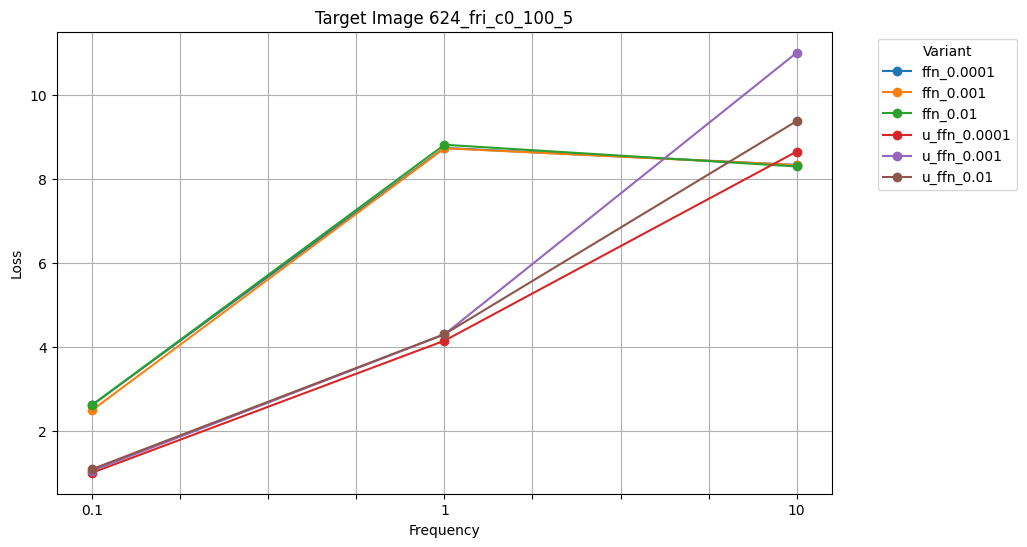

['0.1', '10', '1', '10', '0.1', '10']


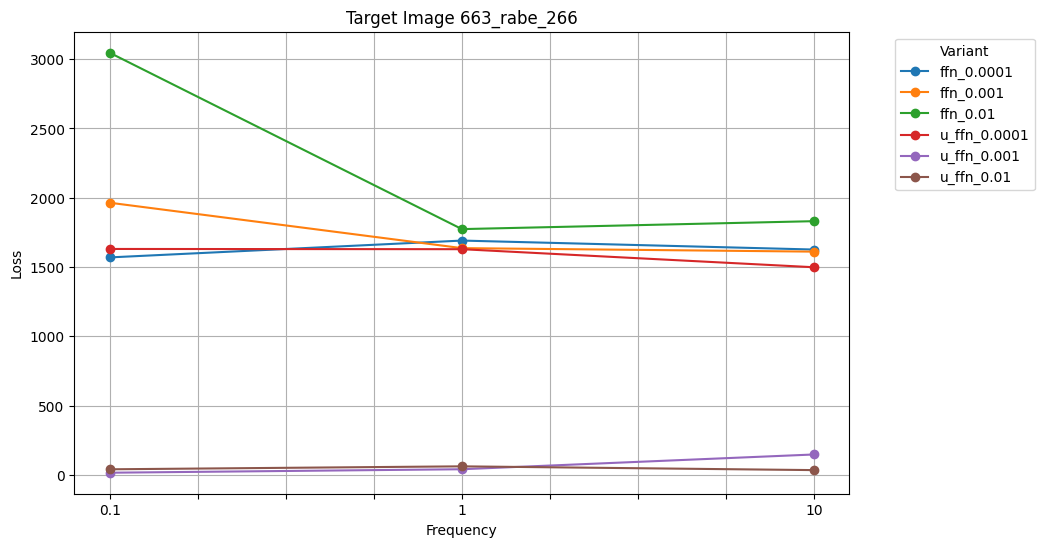

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


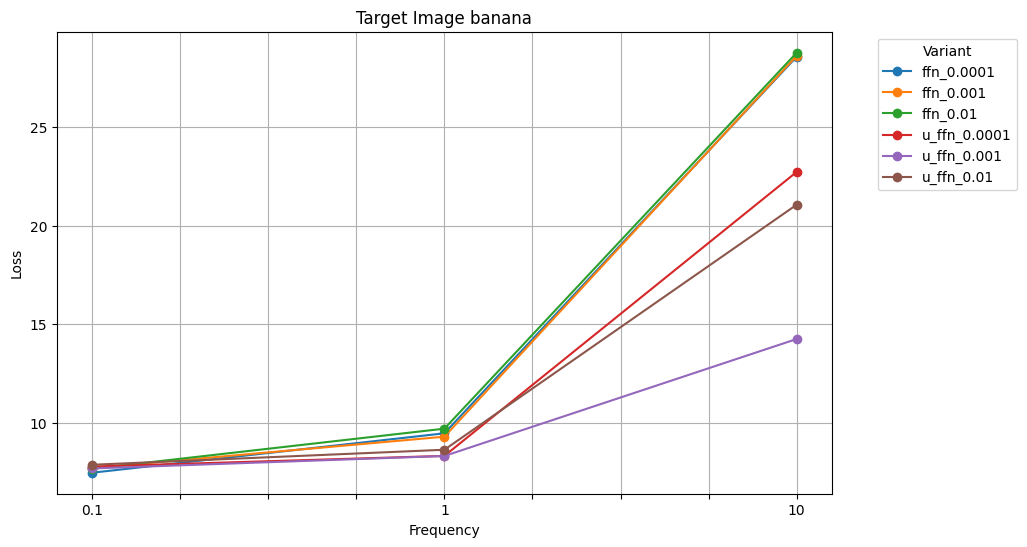

['0.1', '10', '10', '0.1', '0.1', '10']


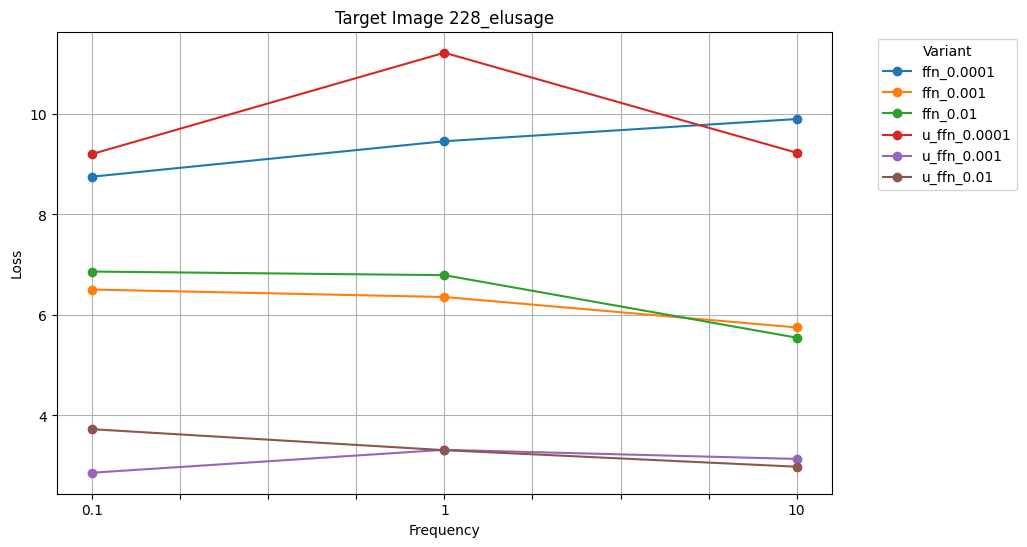

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


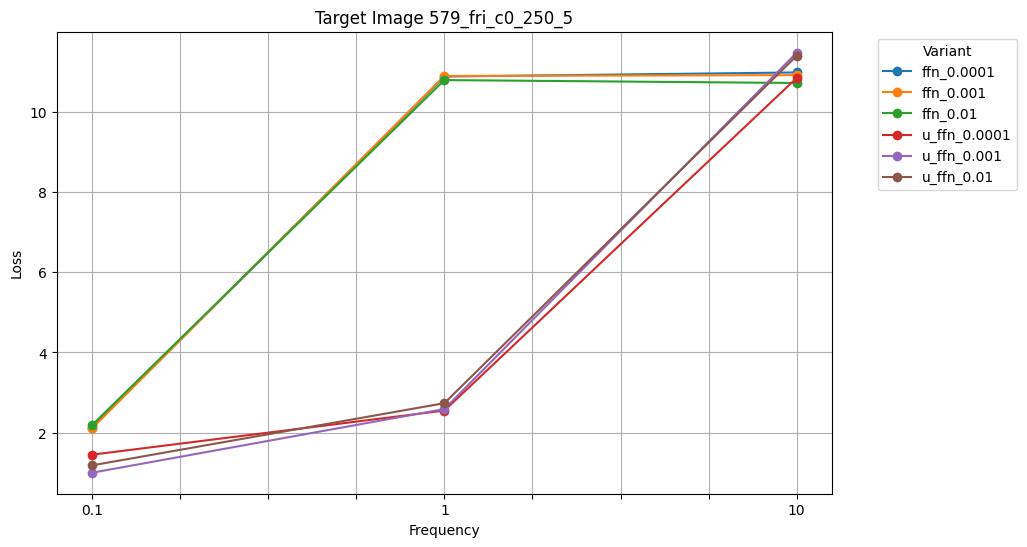

['10', '0.1', '10', '0.1', '0.1', '1']


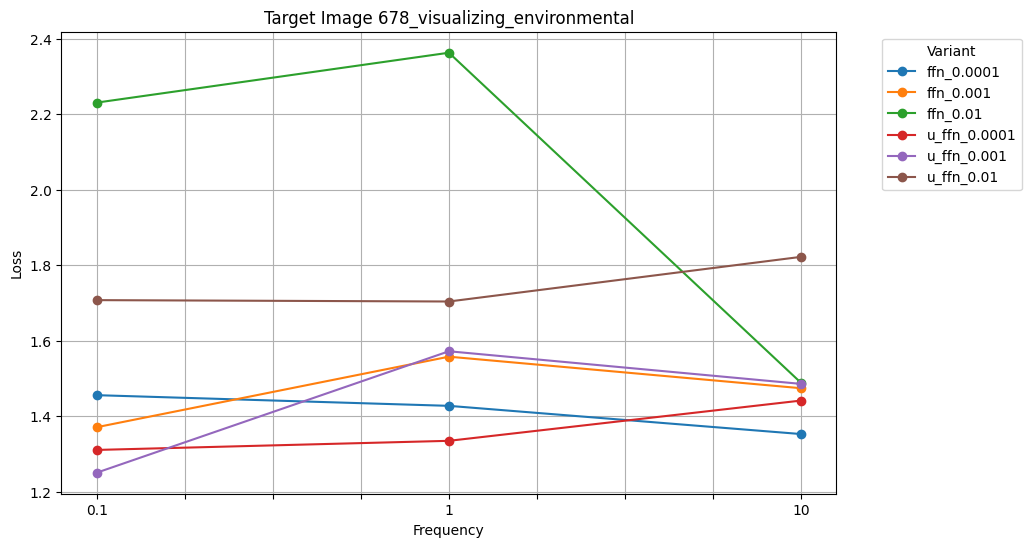

['1', '0.1', '0.1', '10', '0.1', '0.1']


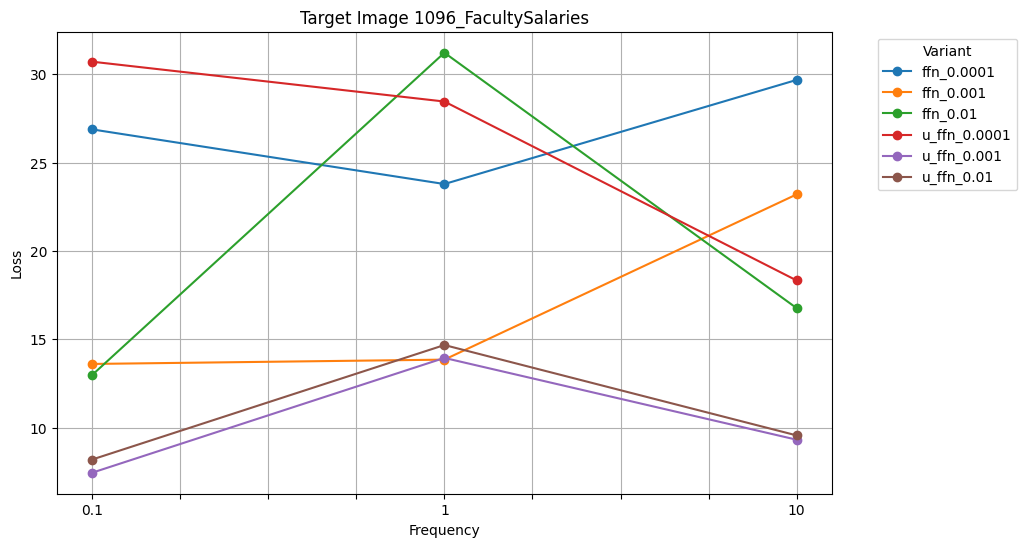

['0.1', '0.1', '0.1', '10', '0.1', '0.1']


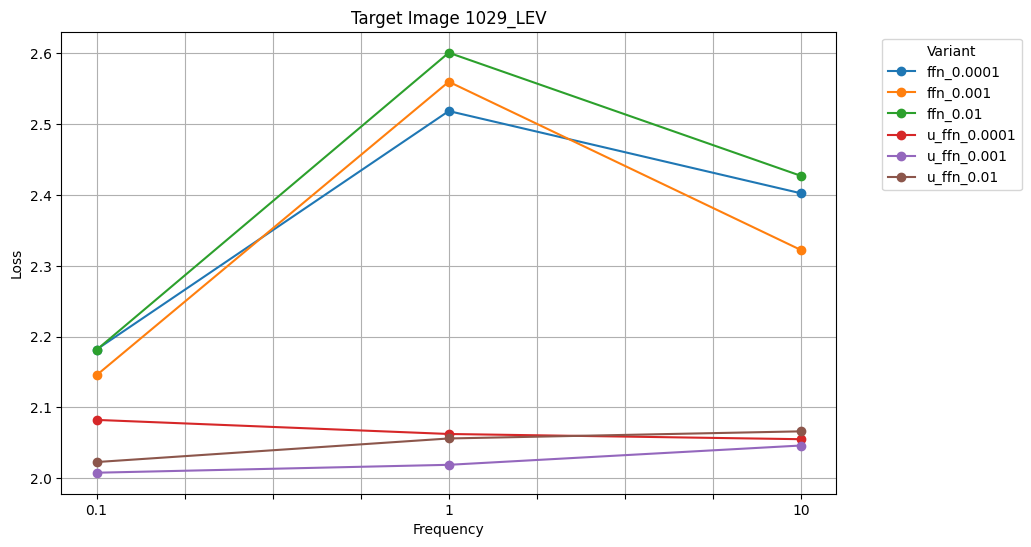

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


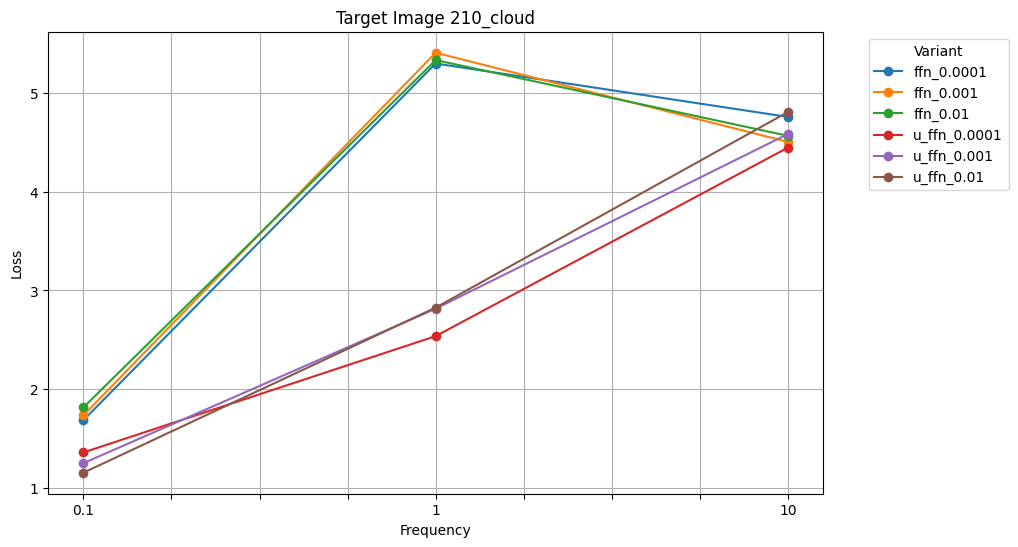

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


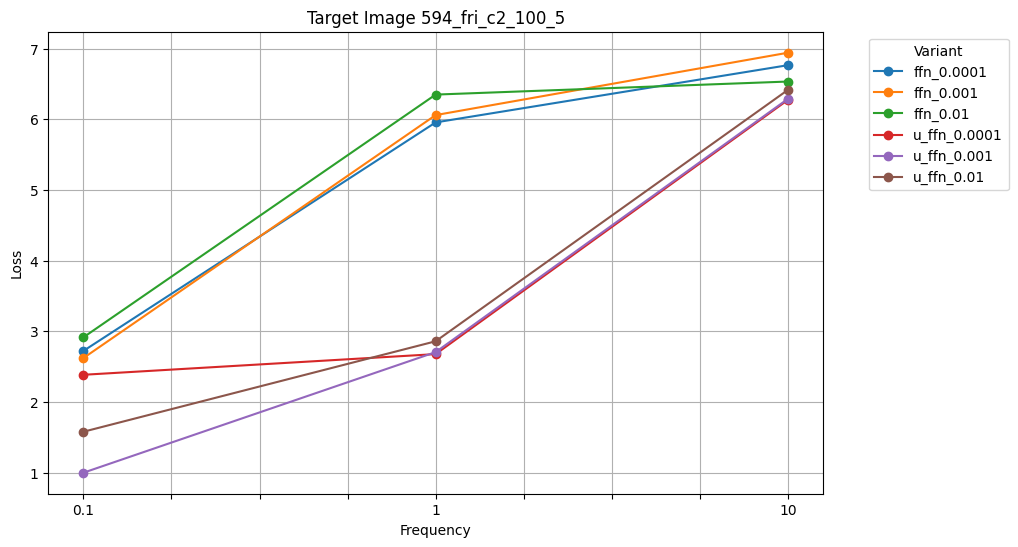

['0.1', '0.1', '0.1', '1', '0.1', '0.1']


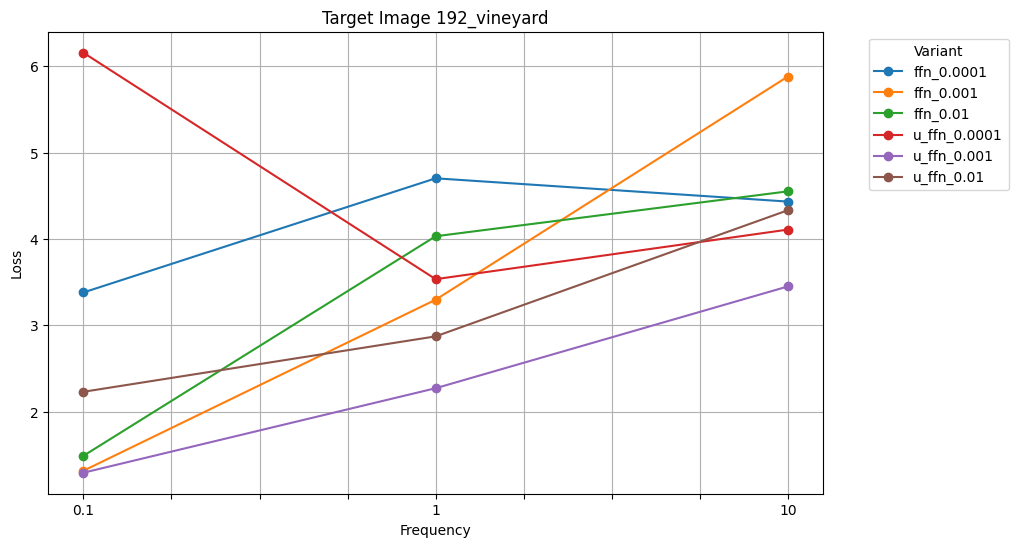

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


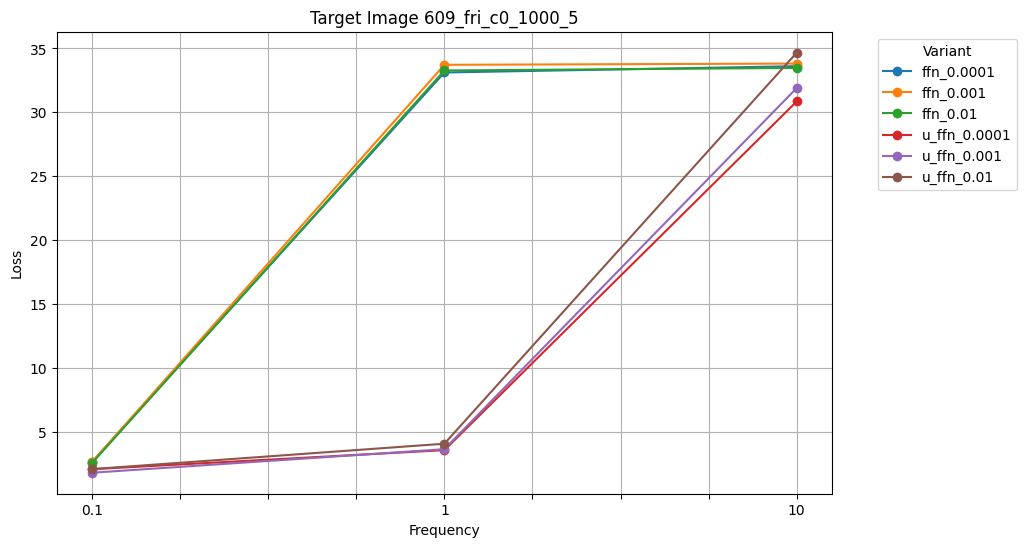

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


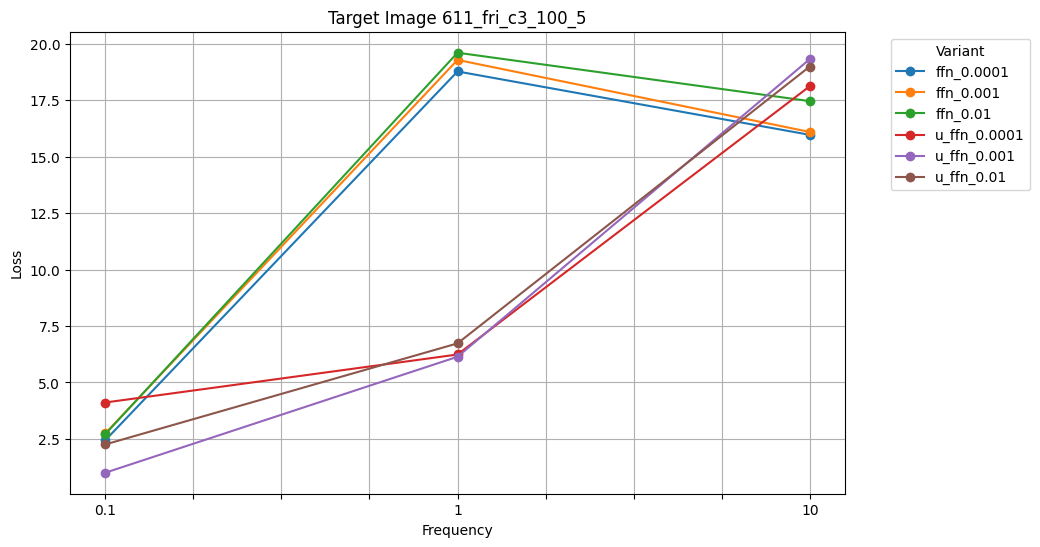

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


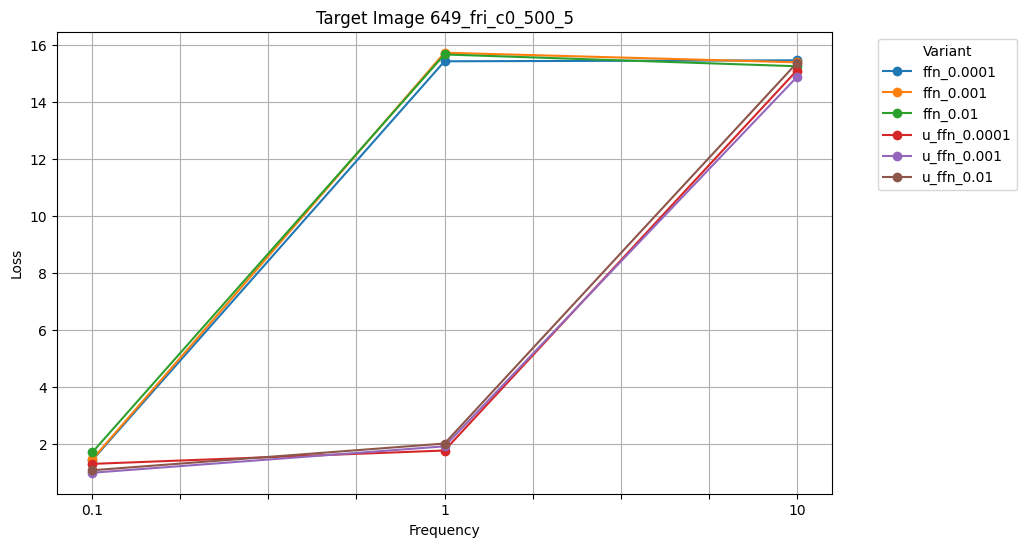

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


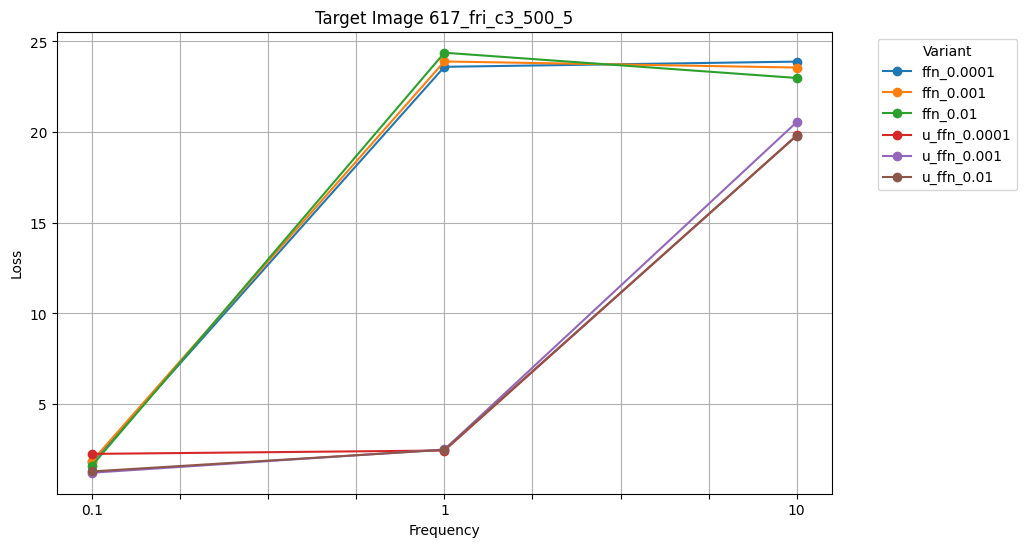

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


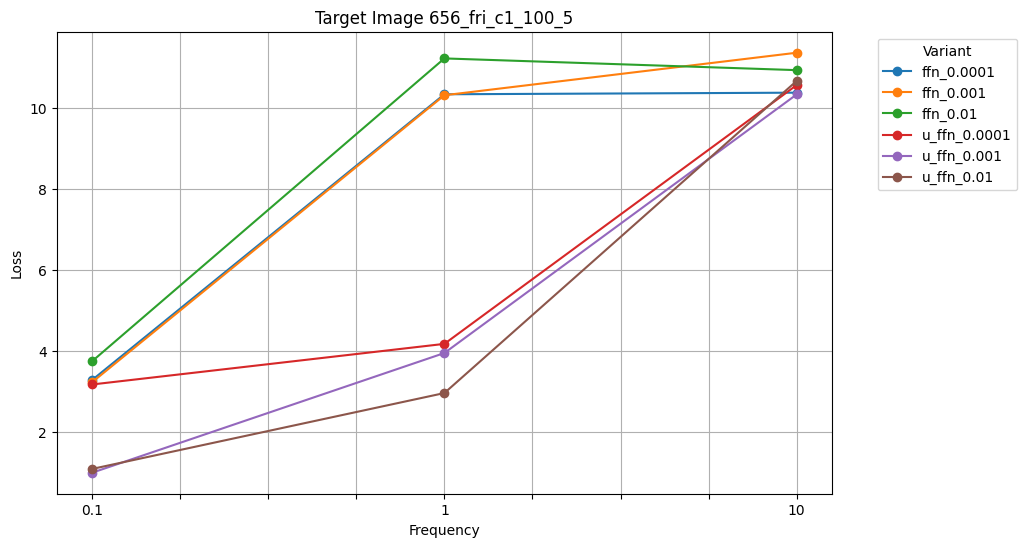

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


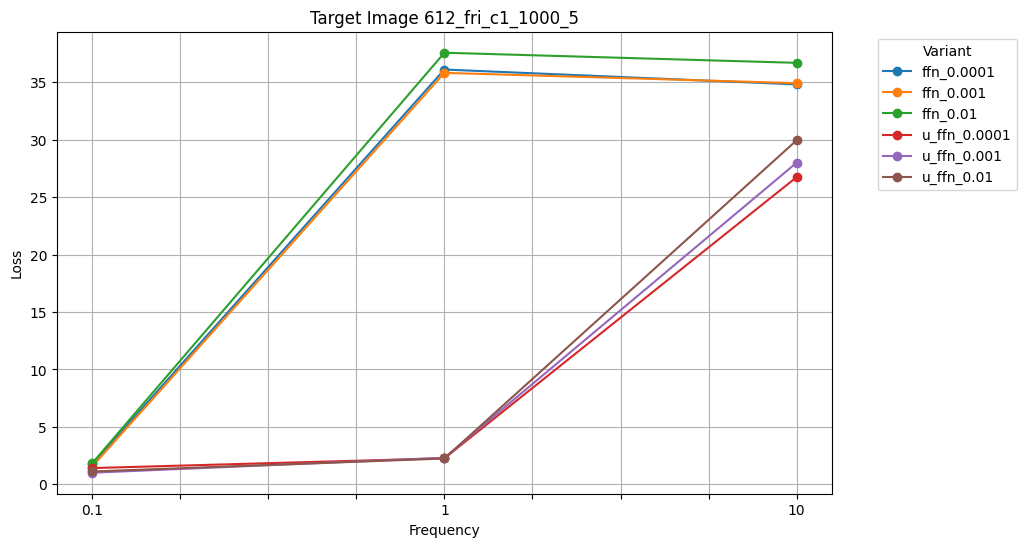

['0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


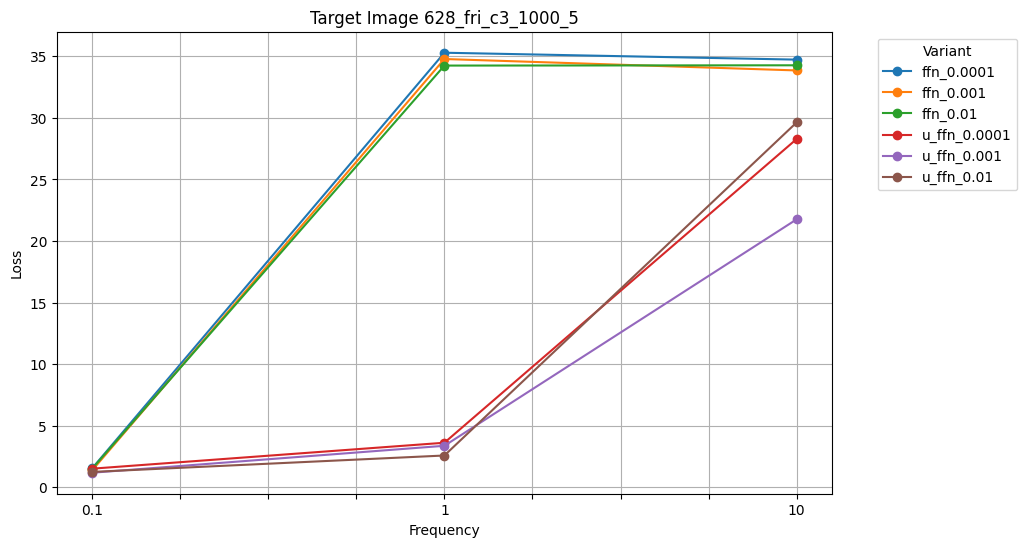

['10', '0.1', '0.1', '10', '0.1', '0.1']


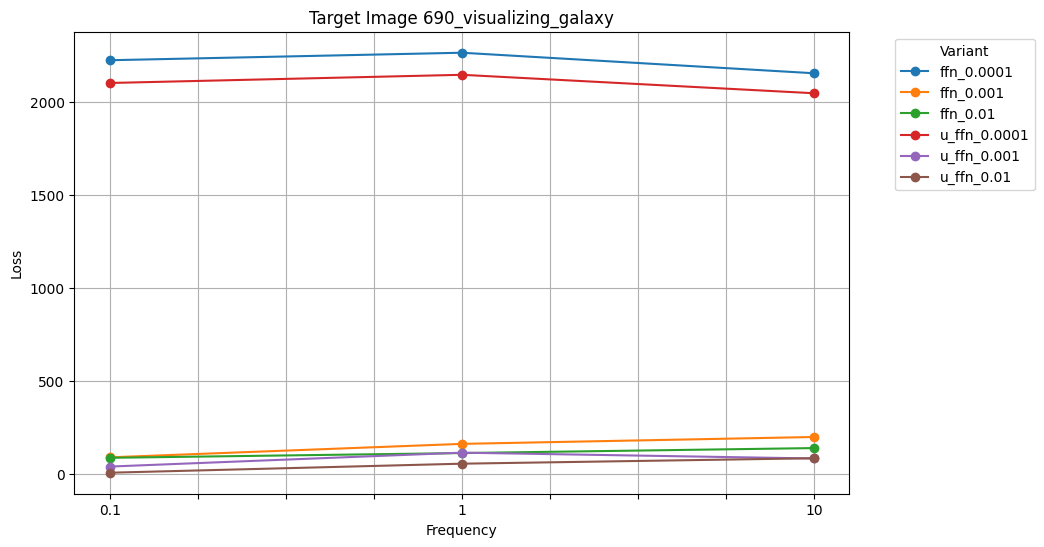

['10', '1', '1', '10', '1', '0.1']


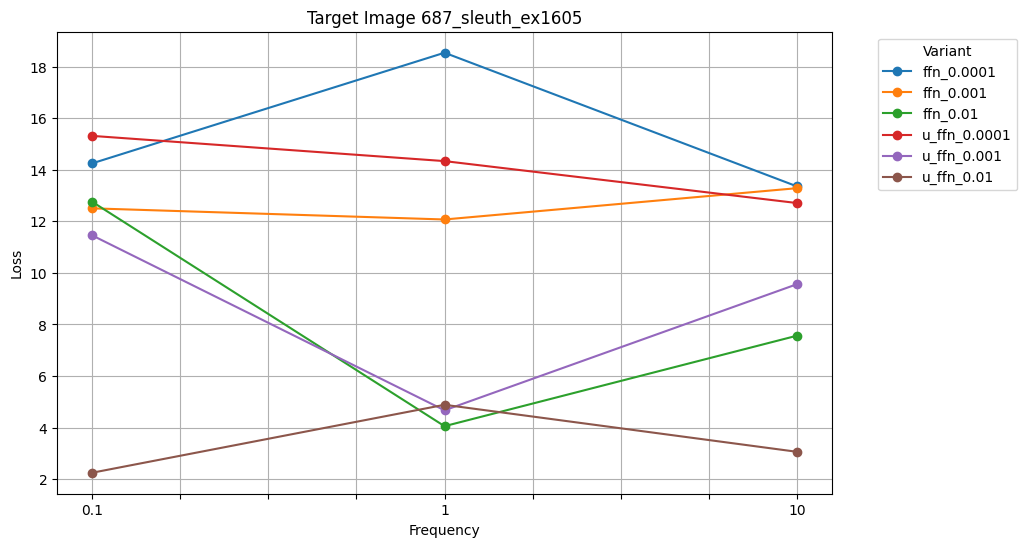

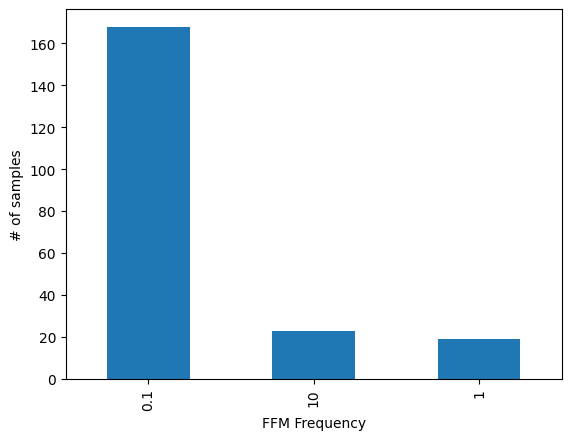

In [27]:
### 
# Filter out columns that are not 'ffn' or 'uffn'
filtered_df = df.filter(regex=r'^(ffn|u_ffn)_')


# Extract the frequency and the rest of the name
ffn_frequency = filtered_df.columns.str.extract(r'_(0\.1|1|10)\s?(rand|uni)?$')[0]
rest_of_name = filtered_df.columns.str.replace(r'(_0\.1|_10|_1)', '', regex=True)

#print((ffn_frequency))
#print(len(rest_of_name))

dfs = [pd.DataFrame(row).transpose() for index, row in filtered_df.iterrows()]

min_val_cols = []

for idx,_df in enumerate(dfs):

    # Combine frequency and rest_of_name into a DataFrame
    new_df_data = {'Name': rest_of_name, 'Frequency': ffn_frequency, 'Value': _df.iloc[0].tolist()}
    new_df = pd.DataFrame(new_df_data)

    # Pivot the DataFrame to get frequencies as columns and the rest as rows
    final_df = new_df.pivot(index='Name', columns='Frequency', values='Value')

    # Getting column names for the minimum value in each row
    min_value_columns = final_df.idxmin(axis=1)

    print(min_value_columns.tolist())
    
    min_val_cols.append(min_value_columns)

    
    # Plotting using pandas built-in function
    ax = final_df.T.plot(kind='line', figsize=(10, 6), marker='o')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Loss')
    ax.set_title(f'Target Image {_df.index[0]}')
    ax.legend(title='Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
    
# Flatten the list of lists
flattened_list = [category for sublist in min_val_cols for category in sublist]

# Convert to pandas Series to count the frequency
category_series = pd.Series(flattened_list)

# Count the frequency of each category
category_counts = category_series.value_counts()

# Plotting
category_counts.plot(kind='bar')
plt.xlabel('FFM Frequency')
plt.ylabel('# of samples')
plt.title('')
plt.savefig("../../../assets/dataset_ffm_hyperparameter.pdf", format="pdf", bbox_inches='tight')

plt.show()
    